In [1]:
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm, DivergingNorm

In [2]:
npd.ppms_init('lockin1', 'lockin2', 'srdc')

Note this uses mT units for getting and setting fields with field() and field_set_stable(). Just divide Oe by 10 to get mT
Connected to: Stanford_Research_Systems SR830 (serial:s/n22100, firmware:ver1.01) in 0.23s
Connected to: Stanford_Research_Systems SR830 (serial:s/n35235, firmware:ver1.07) in 0.06s
Connected to: Stanford_Research_Systems DC205 (serial:s/n20500044, firmware:ver1.80) in 0.04s


In [118]:
del qc.Instrument._all_instruments['k2200']

In [121]:
k2200 = npd.Keithley_2200('k2200', 'GPIB::22::INSTR')

Connected to: Keithley Instruments 2200-72-1 (serial:9200719, firmware:1.28-1.26) in 0.07s


In [48]:
station = qc.Station(ppms, lockin1, lockin2, srdc)

In [122]:
station.add_component(k2200)

'k2200'

In [123]:
station.snapshot()

{'instruments': {'ppms': {'functions': {},
   'submodules': {},
   '__class__': 'qcodes.instrument_drivers.nplab_drivers.QD.QD',
   'parameters': {'IDN': {'value': {'vendor': None,
      'model': 'ppms',
      'serial': None,
      'firmware': None},
     'ts': '2019-12-31 16:53:35',
     'raw_value': {'vendor': None,
      'model': 'ppms',
      'serial': None,
      'firmware': None},
     '__class__': 'qcodes.instrument.parameter.Parameter',
     'full_name': 'ppms_IDN',
     'unit': '',
     'name': 'IDN',
     'post_delay': 0,
     'inter_delay': 0,
     'vals': '<Anything>',
     'instrument': 'qcodes.instrument_drivers.nplab_drivers.QD.QD',
     'instrument_name': 'ppms',
     'label': 'IDN'},
    'temperature': {'value': 300,
     'ts': '2020-01-01 20:22:01',
     'raw_value': 300,
     '__class__': 'qcodes.instrument.parameter.Parameter',
     'full_name': 'ppms_temperature',
     'unit': 'K',
     'name': 'temperature',
     'post_delay': 0,
     'inter_delay': 0,
     'vals'

In [124]:
k2200.voltage()

0.0

In [125]:
k2200.voltage.step = 0.07
k2200.voltage.inter_delay = 0.1

In [127]:
k2200.voltage(10)

In [128]:
k2200.voltage(0)

In [129]:
k2200.output(1)

In [5]:
srdc.volt(2.5)

In [6]:
srdc.volt(0)

In [12]:
srdc.volt()

0.0

In [13]:
srdc.range(1) #+/- 10V range

In [16]:
srdc.volt.step = 0.05
srdc.volt.inter_delay = 0.1

In [17]:
srdc.volt(1)

In [18]:
srdc.volt(0)

In [36]:
srdc.output(1)

In [7]:
lockin2.X()

-3.87432e-07

In [8]:
lockin2.amplitude(0.004)

Measure M12 (0.98 degree device) at different temperatures. Just set up the SRS DC205 DC source, so that will work as gate. Use lockin2 as the source, with 100 MOhms as the limiting resistor, frequency 13.333

From Triton conversion to PPMS:

bg(44)-5, 21-4, 48-3, 24-14, 23-13, 22-12, 20-11, 19-10, 13-9, 12-8, 9-6

Connected backgate (5), 10 as source to lockin2, 4 is grounded, measure 11-12

In [44]:
lockin2.amplitude(0.2) #2 nA

In [45]:
lockin2.X()/2e-9 # in ohms at 0Vbg

11432.949999999999

In [46]:
srdc.volt(-10)
time.sleep(7)
gvals = np.linspace(-10, 10, 201)
data1, plot1 = npd.single_param_sweep(srdc.volt, gvals, 2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_300K_2nA')

Started at 2019-12-31 16:45:56
DataSet:
   location = 'data/2019-12-31/#002_M12_11-12_gsweep_300K_2nA_16-45-55'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2019-12-31 16:53:13


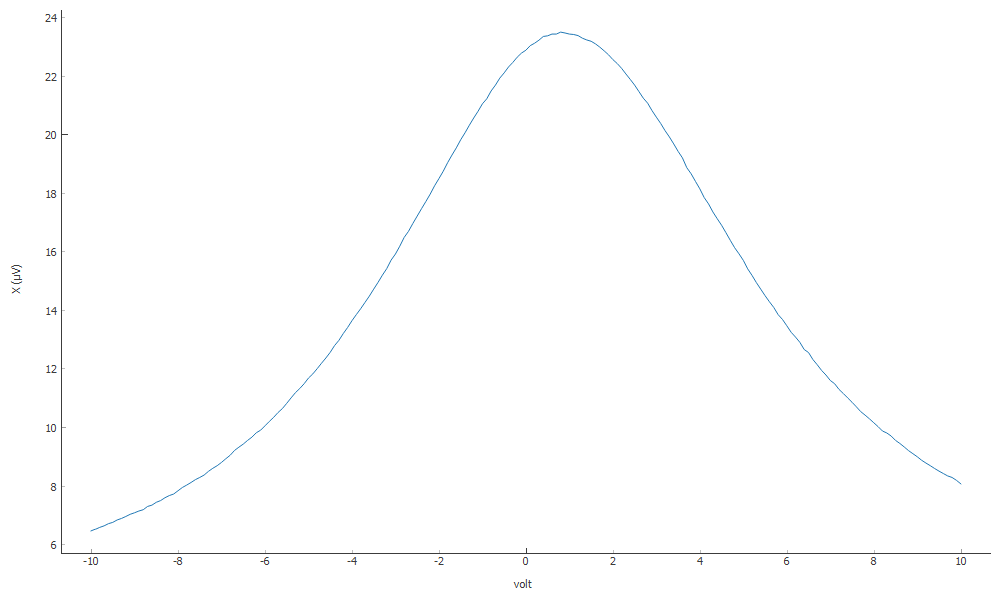

In [47]:
plot1[0]

In [50]:
ppms.temperature_rate = 5
ppms.temperature(2)

In [51]:
lockin2.amplitude(0.1) # switch to 1nA

In [52]:
srdc.volt()

10.0

In [53]:
srdc.volt(0)

In [54]:
srdc.volt(-10)
time.sleep(400)
gvals = np.linspace(-10, 10, 501)
data2, plot2 = npd.single_param_sweep(srdc.volt, gvals, 2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_2K_1nA')

Started at 2019-12-31 18:07:06
DataSet:
   location = 'data/2019-12-31/#003_M12_11-12_gsweep_2K_1nA_18-07-05'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (501,)
   Measured | lockin2_X     | X            | (501,)
   Measured | lockin2_Y     | Y            | (501,)
Finished at 2019-12-31 18:24:25


In [55]:
srdc.volt(0)

In [56]:
lockin2.amplitude(0.5) # 5 nA

In [57]:
srdc.volt(10)
time.sleep(8)
gvals = np.linspace(10, -10, 201)
data3, plot3 = npd.single_param_sweep(srdc.volt, gvals, 2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_2K_5nA')

Started at 2019-12-31 20:11:54
DataSet:
   location = 'data/2019-12-31/#004_M12_11-12_gsweep_2K_5nA_20-11-53'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2019-12-31 20:19:12


In [58]:
srdc.volt(0)
lockin2.amplitude(0.1) # back to 1 nA

In [59]:
ppms.temperature(1.75)

In [60]:
lockin2.amplitude(0.5) # back to 5 nA

In [61]:
srdc.volt(-10)  # now try grounding 6, 3, 4, measure 11-12 still
time.sleep(8)
gvals = np.linspace(-10, 10, 201)
data3, plot3 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_5nA')

Started at 2020-01-01 14:59:36
DataSet:
   location = 'data/2020-01-01/#001_M12_11-12_gsweep_1p75K_5nA_14-59-35'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-01 15:07:34


In [62]:
srdc.volt(0)

In [63]:
lockin2.amplitude(0.004)

Checked through the contacts using 2-pt current measurements with a 1Mohm resistor and 4 mV -> 3.6-3.9 nA. 10 and 4 (source and drain seem pretty good, as well as all the others). Try measuring 9-8

In [64]:
lockin2.amplitude(0.5)  # 5 nA

In [65]:
srdc.volt(-10)  
time.sleep(8)
gvals = np.linspace(-10, 10, 201)
data4, plot4 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_9-8_gsweep_1p75K_5nA')

Started at 2020-01-01 15:23:36
DataSet:
   location = 'data/2020-01-01/#002_M12_9-8_gsweep_1p75K_5nA_15-23-35'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-01 15:31:33


In [66]:
srdc.volt(0)

In [69]:
lockin2.amplitude(0.5)

In [70]:
srdc.volt(-10)  # try 14-3, in case the device got flipped around somehow...  
time.sleep(8)
gvals = np.linspace(-10, 10, 201)
data4, plot4 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_14-3_gsweep_1p75K_5nA')

Started at 2020-01-01 15:36:41
DataSet:
   location = 'data/2020-01-01/#004_M12_14-3_gsweep_1p75K_5nA_15-36-40'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-01 15:44:40


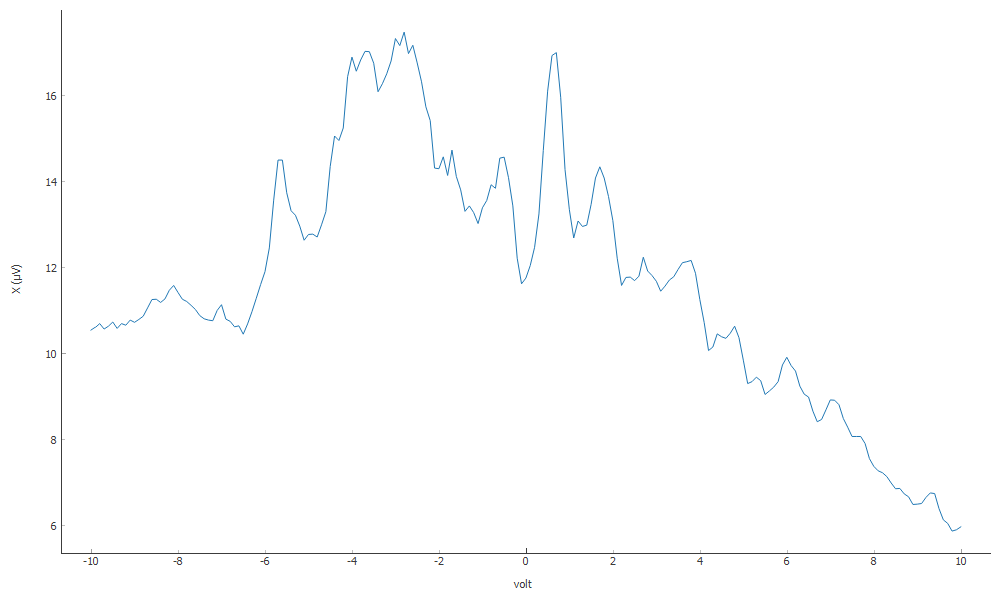

In [110]:
plot4[0]

In [71]:
srdc.volt(0)

In [76]:
srdc.output(0)

In [77]:
srdc.range(2)

In [78]:
srdc.output(1)

Note that the source requires you to have the output off if you want to change the range...

In [79]:
srdc.volt(-13)   # back to 9-8 with a larger range
time.sleep(8)
gvals = np.linspace(-13, 13, 261)
data6, plot6 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_9-8_gsweep_1p75K_5nA')

Started at 2020-01-01 15:51:02
DataSet:
   location = 'data/2020-01-01/#005_M12_9-8_gsweep_1p75K_5nA_15-51-01'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (261,)
   Measured | lockin2_X     | X            | (261,)
   Measured | lockin2_Y     | Y            | (261,)
Finished at 2020-01-01 16:01:22


In [80]:
srdc.volt(0)

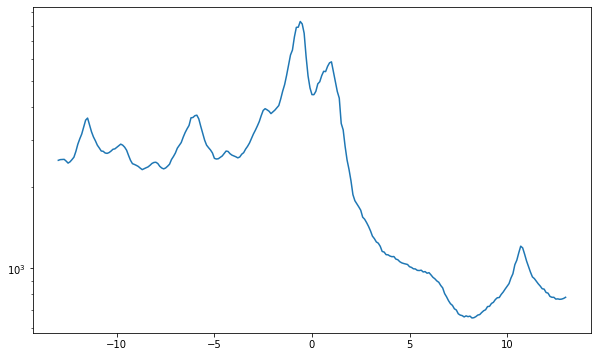

In [83]:
plt.figure(figsize=(10, 6))
plt.semilogy(data6.srdc_volt_set[:], data6.lockin2_X[:]/5e-9)

In [84]:
srdc.volt(-13)   # 12-13
time.sleep(8)
gvals = np.linspace(-13, 13, 261)
data7, plot7 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_12-13_gsweep_1p75K_5nA')
srdc.volt(0)

Started at 2020-01-01 16:06:18
DataSet:
   location = 'data/2020-01-01/#006_M12_12-13_gsweep_1p75K_5nA_16-06-17'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (261,)
   Measured | lockin2_X     | X            | (261,)
   Measured | lockin2_Y     | Y            | (261,)
Finished at 2020-01-01 16:16:38


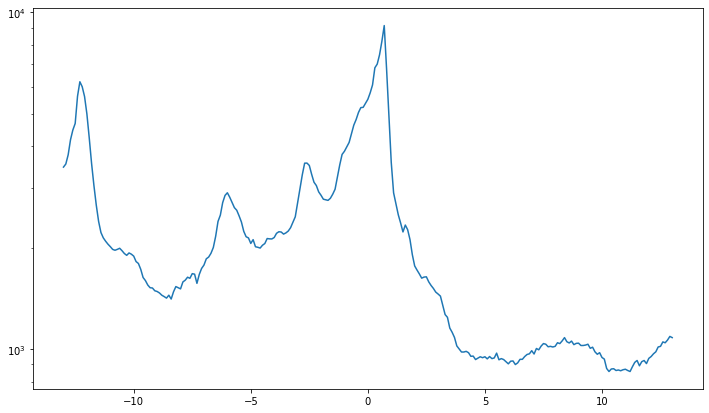

In [86]:
plt.figure(figsize=(12,7))
plt.semilogy(data7.srdc_volt_set[:], data7.lockin2_X[:]/5e-9)

In [87]:
srdc.volt(-15)   # 12-13
time.sleep(8)
gvals = np.linspace(-15, 15, 601)
data8, plot8 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_12-13_gsweep_1p75K_5nA')
srdc.volt(0)

Started at 2020-01-01 16:20:15
DataSet:
   location = 'data/2020-01-01/#007_M12_12-13_gsweep_1p75K_5nA_16-20-14'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (601,)
   Measured | lockin2_X     | X            | (601,)
   Measured | lockin2_Y     | Y            | (601,)
Finished at 2020-01-01 16:43:04


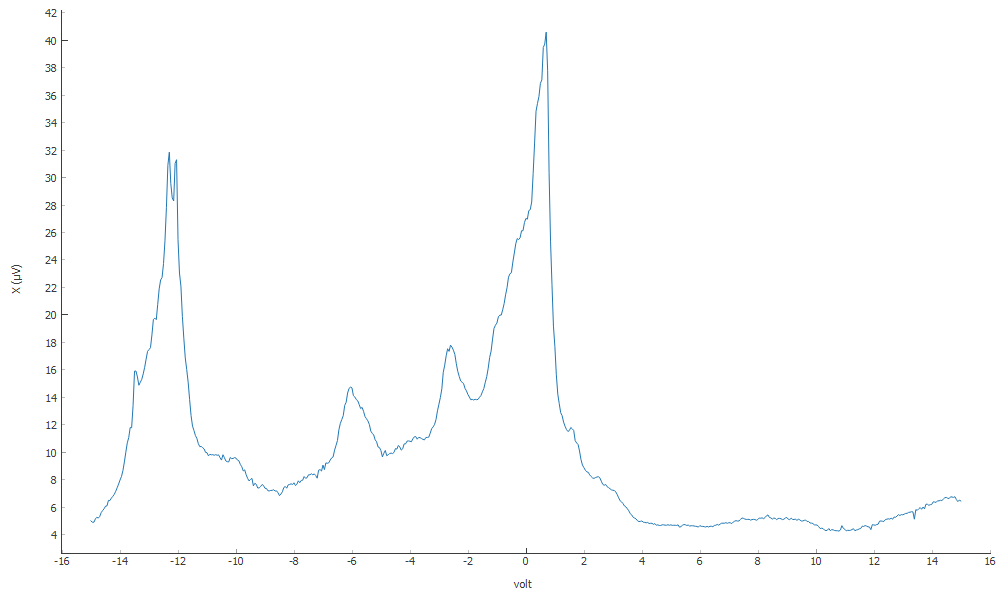

In [109]:
plot8[0]

In [92]:
srdc.volt(0)

I don't know why, but it doesn't go back up to a high resistance. Not even if you go to 16.5V

In [93]:
lockin2.amplitude(0.2)

In [94]:
srdc.volt(-15)   # 9-8  2 nA
time.sleep(8)
gvals = np.linspace(-15, 15, 601)
data9, plot9 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_9-8_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-01 16:48:26
DataSet:
   location = 'data/2020-01-01/#008_M12_9-8_gsweep_1p75K_2nA_16-48-25'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (601,)
   Measured | lockin2_X     | X            | (601,)
   Measured | lockin2_Y     | Y            | (601,)
Finished at 2020-01-01 17:11:17


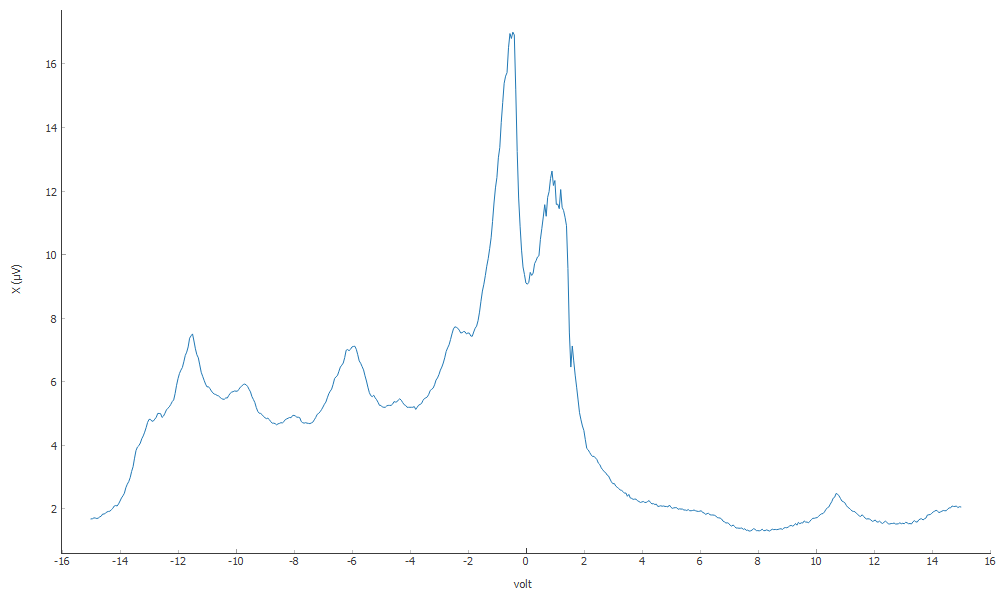

In [107]:
plot9[0]

In [95]:
srdc.volt(-15)   # 9-8  2 nA, use 11 as source, 13 as drain now.
time.sleep(8)
gvals = np.linspace(-15, 15, 601)
data10, plot10 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_9-8_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-01 17:17:16
DataSet:
   location = 'data/2020-01-01/#009_M12_9-8_gsweep_1p75K_2nA_17-17-15'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (601,)
   Measured | lockin2_X     | X            | (601,)
   Measured | lockin2_Y     | Y            | (601,)
Finished at 2020-01-01 17:40:08


In [96]:
lockin2.amplitude(0.05)

In [97]:
srdc.volt(-15)   # back to 10-4 as source-drain, 11-12, 0.5 nA now
time.sleep(8)
gvals = np.linspace(-15, 15, 601)
data11, plot11 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_0p5nA')
srdc.volt(0)

Started at 2020-01-01 17:52:44
DataSet:
   location = 'data/2020-01-01/#010_M12_11-12_gsweep_1p75K_0p5nA_17-52-43'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (601,)
   Measured | lockin2_X     | X            | (601,)
   Measured | lockin2_Y     | Y            | (601,)
Finished at 2020-01-01 18:15:37


In [98]:
srdc.isolation(0)  # 0 is grounded negative side, 1 is floating.
time.sleep(2)
srdc.isolation()  # try grounded. If nothing works, then warm up.

0

In [99]:
lockin2.amplitude(0.2)

In [100]:
srdc.volt(-15)   # 2 nA now
time.sleep(8)
gvals = np.linspace(-15, 15, 601)
data11, plot11 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-01 19:36:38
DataSet:
   location = 'data/2020-01-01/#011_M12_11-12_gsweep_1p75K_2nA_19-36-37'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (601,)
   Measured | lockin2_X     | X            | (601,)
   Measured | lockin2_Y     | Y            | (601,)
Finished at 2020-01-01 19:59:27


In [101]:
ppms.temperature(300)

In [102]:
lockin2.amplitude(0.004)

In [103]:
srdc.output(0)

In [104]:
srdc.isolation(1)

After a thermal cycle

In [130]:
lockin2.amplitude(0.2)

In [131]:
srdc.output(1)

In [132]:
srdc.volt(-10)   # 2 nA now
time.sleep(8)
gvals = np.linspace(-10, 10, 101)
data12, plot12 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_300K_2nA')
srdc.volt(0)

Started at 2020-01-02 13:57:47
DataSet:
   location = 'data/2020-01-02/#001_M12_11-12_gsweep_300K_2nA_13-57-46'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (101,)
   Measured | lockin2_X     | X            | (101,)
   Measured | lockin2_Y     | Y            | (101,)
Finished at 2020-01-02 14:02:07


In [133]:
ppms.temperature(2)

In [134]:
lockin2.amplitude(0.004)

In [136]:
ppms.temperature()

6.5163798332214355

In [137]:
ppms.temperature(1.75)

In [138]:
lockin2.amplitude(0.2)

In [139]:
# try using the k2200. Same electrodes: 11-12
k2200.voltage(10)
time.sleep(8)
gvals = np.linspace(10, 0, 201)  # negative gate voltage here
data13, plot13 = npd.single_param_sweep(k2200.voltage, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-02 15:16:43
DataSet:
   location = 'data/2020-01-02/#002_M12_11-12_gsweep_1p75K_2nA_15-16-42'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (201,)
   Measured | lockin2_X         | X            | (201,)
   Measured | lockin2_Y         | Y            | (201,)
Finished at 2020-01-02 15:24:21


In [142]:
k2200.voltage(0)
time.sleep(8)
gvals = np.linspace(0.05, 10, 200)  # positive gate voltage here
data14, plot14 = npd.single_param_sweep(k2200.voltage, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-02 15:26:40
DataSet:
   location = 'data/2020-01-02/#004_M12_11-12_gsweep_1p75K_2nA_15-26-39'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (200,)
   Measured | lockin2_X         | X            | (200,)
   Measured | lockin2_Y         | Y            | (200,)
Finished at 2020-01-02 15:34:17


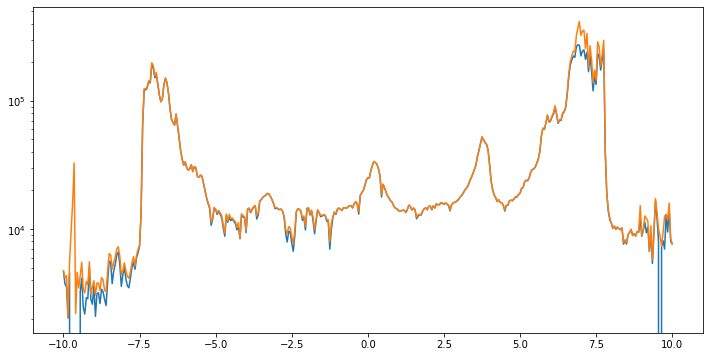

In [143]:
plt.figure(figsize=(12, 6))
gs = np.linspace(-10, 10, 401)
Rxx_X = np.concatenate((data13.lockin2_X[:], data14.lockin2_X[:]))/2e-9
Rxx_Y = np.concatenate((data13.lockin2_Y[:], data14.lockin2_Y[:]))/2e-9
Rxx_R = np.sqrt(Rxx_X**2 + Rxx_Y**2)
plt.semilogy(gs, Rxx_X)
plt.semilogy(gs, Rxx_R)

In [144]:
k2200.voltage(0)

In [145]:
srdc.volt(-10)   # Try again with the SRS DC source...
time.sleep(8)
gvals = np.linspace(-9, 9, 361)
data15, plot15 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-02 15:37:03
DataSet:
   location = 'data/2020-01-02/#005_M12_11-12_gsweep_1p75K_2nA_15-37-02'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (361,)
   Measured | lockin2_X     | X            | (361,)
   Measured | lockin2_Y     | Y            | (361,)
Finished at 2020-01-02 15:50:46


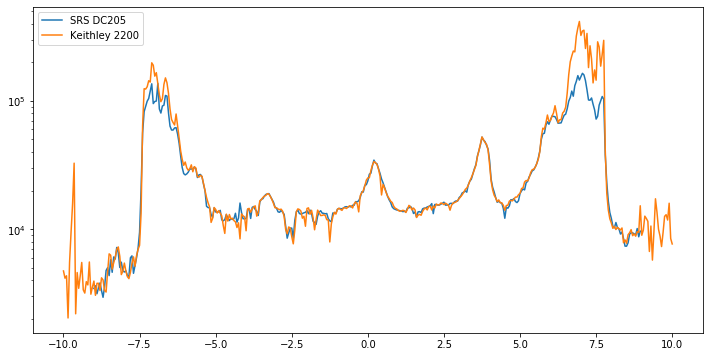

In [147]:
plt.figure(figsize=(12, 6))
gs_2 = np.linspace(-9, 9, 361)
RxxS_X = data15.lockin2_X[:]/2e-9
RxxS_Y = data15.lockin2_Y[:]/2e-9
RxxS_R = np.sqrt(RxxS_X**2 + RxxS_Y**2)
plt.semilogy(gs_2, RxxS_R, label='SRS DC205')
plt.semilogy(gs, Rxx_R, label='Keithley 2200')
plt.legend()

In [151]:
lockin2.amplitude(0.5)
srdc.volt(-10)   # try with 5 nA
time.sleep(8)
gvals = np.linspace(-9, 9, 361)
data16, plot16 = npd.single_param_sweep(srdc.volt, gvals, 2.2, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_5nA')
srdc.volt(0)

Started at 2020-01-02 16:12:07
DataSet:
   location = 'data/2020-01-02/#006_M12_11-12_gsweep_1p75K_5nA_16-12-06'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (361,)
   Measured | lockin2_X     | X            | (361,)
   Measured | lockin2_Y     | Y            | (361,)
Finished at 2020-01-02 16:25:51


In [153]:
lockin2.amplitude(0.2)
lockin2.time_constant(0.1)
lockin2.filter_slope(24)

In [154]:
srdc.volt(-10)   # One last try with lower time constant and smaller amount of delay. Use this one
time.sleep(8)
gvals = np.linspace(-9, 9, 361)
data17, plot17 = npd.single_param_sweep(srdc.volt, gvals, 1.4, lockin2.X, lockin2.Y, DataName='M12_11-12_gsweep_1p75K_2nA')
srdc.volt(0)

Started at 2020-01-02 16:28:17
DataSet:
   location = 'data/2020-01-02/#007_M12_11-12_gsweep_1p75K_2nA_16-28-15'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (361,)
   Measured | lockin2_X     | X            | (361,)
   Measured | lockin2_Y     | Y            | (361,)
Finished at 2020-01-02 16:37:12


In [157]:
%matplotlib notebook

<IPython.core.display.Javascript object>


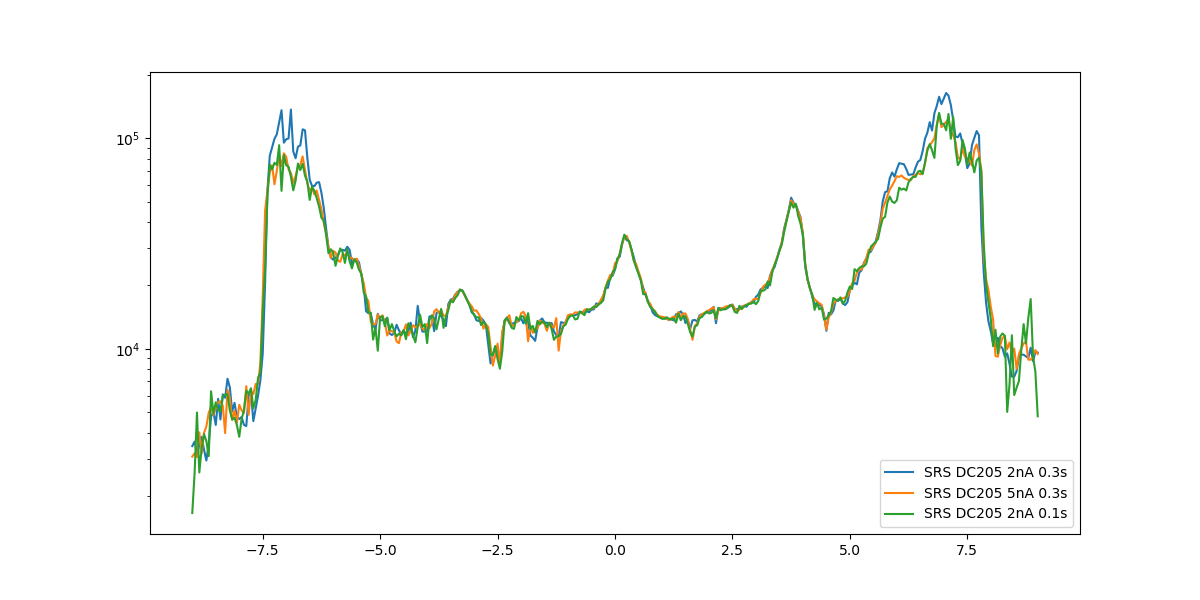

In [158]:
plt.figure(figsize=(12, 6))
gs_2 = np.linspace(-9, 9, 361)
RxxS_2_X = data16.lockin2_X[:]/5e-9
RxxS_2_Y = data16.lockin2_Y[:]/5e-9
RxxS_2_R = np.sqrt(RxxS_2_X**2 + RxxS_2_Y**2)
RxxS_3_X = data17.lockin2_X[:]/2e-9
RxxS_3_Y = data17.lockin2_Y[:]/2e-9
RxxS_3_R = np.sqrt(RxxS_3_X**2 + RxxS_3_Y**2)
plt.semilogy(gs_2, RxxS_R, label='SRS DC205 2nA 0.3s')
plt.semilogy(gs_2, RxxS_2_R, label='SRS DC205 5nA 0.3s')
plt.semilogy(gs_2, RxxS_3_R, label='SRS DC205 2nA 0.1s')
# plt.semilogy(gs, Rxx_R, label='Keithley 2200 2nA')
plt.legend()

Ok, use 2 nA, 0.1s TC, 24 dB slope, 1.4s delay time, and do the 2D sweeps

In [159]:
np.linspace(22, 120, 50)

array([ 22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120.])

In [160]:
Tvals = np.linspace(2, 20, 19)
gvals = np.linspace(-9, 9, 361)
data18, plot18 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, srdc.volt, gvals, lockin2.X, lockin2.Y, SetDelay1=7, SetDelay2=1.4, Param2_SetBetween=0, DataName='M12_11-12_temp_gsweep_2to20K_2nA')

Started at 2020-01-02 16:42:27
Temperature timeout
DataSet:
   location = 'data/2020-01-02/#008_M12_11-12_temp_gsweep_2to20K_2nA_16-42-25'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (19,)
   Setpoint | srdc_volt_set                   | volt                   | (19, 361)
   Measured | lockin2_X                       | X                      | (19, 361)
   Measured | lockin2_Y                       | Y                      | (19, 361)
Finished at 2020-01-02 20:10:35


In [161]:
Tvals = np.linspace(22, 120, 50)
gvals = np.linspace(-9, 9, 361)
data19, plot19 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, srdc.volt, gvals, lockin2.X, lockin2.Y, SetDelay1=7, SetDelay2=1.4, Param2_SetBetween=0, DataName='M12_11-12_temp_gsweep_22to120K_2nA')

Started at 2020-01-02 20:10:37
DataSet:
   location = 'data/2020-01-02/#009_M12_11-12_temp_gsweep_22to120K_2nA_20-10-35'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (50,)
   Setpoint | srdc_volt_set                   | volt                   | (50, 361)
   Measured | lockin2_X                       | X                      | (50, 361)
   Measured | lockin2_Y                       | Y                      | (50, 361)
Finished at 2020-01-03 05:23:28


In [162]:
srdc.volt(0)
lockin2.amplitude(0.004)

In [163]:
ppms.temperature_rate = 10
ppms.temperature(300)

In [164]:
srdc.volt(-6)
time.sleep(7)
gvals = np.linspace(-6, 6, 121)
data20, plot20 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_7-8_gsweep_300K_2nA')

Started at 2020-01-03 13:02:33
DataSet:
   location = 'data/2020-01-03/#001_M25_7-8_gsweep_300K_2nA_13-02-31'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (121,)
   Measured | lockin2_X     | X            | (121,)
   Measured | lockin2_Y     | Y            | (121,)
Finished at 2020-01-03 13:04:54


In [165]:
srdc.volt(0)

In [166]:
srdc.volt(-6)
time.sleep(7)
gvals = np.linspace(-6, 6, 121)
data21, plot21 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_3-14_gsweep_300K_2nA')

Started at 2020-01-03 13:08:38
DataSet:
   location = 'data/2020-01-03/#002_M25_3-14_gsweep_300K_2nA_13-08-37'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (121,)
   Measured | lockin2_X     | X            | (121,)
   Measured | lockin2_Y     | Y            | (121,)
Finished at 2020-01-03 13:11:00


In [167]:
srdc.volt(0)

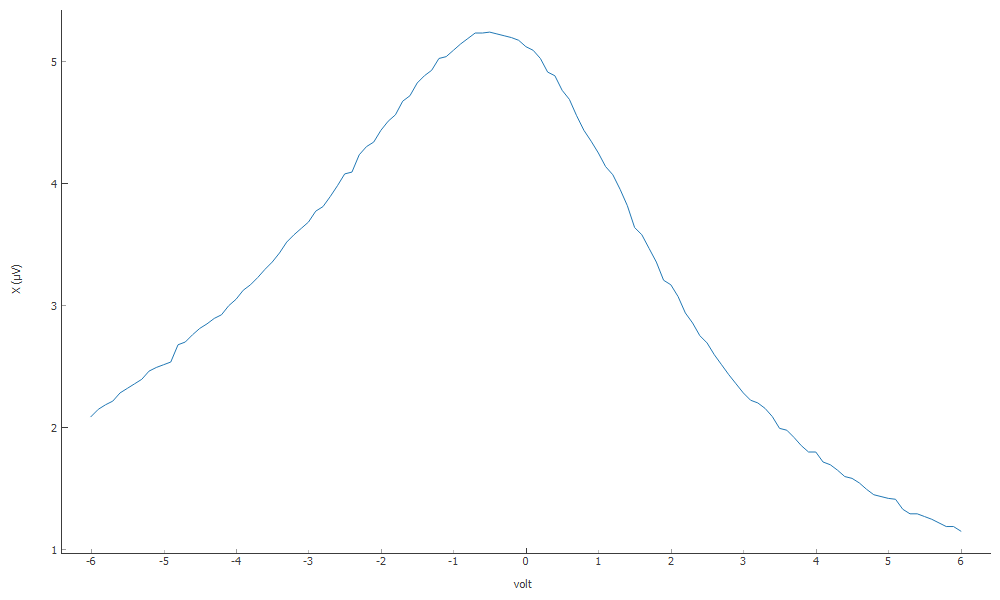

In [168]:
plot21[0]

In [189]:
lockin2.X()

6.58634e-06

In [180]:
srdc.volt(-6)
time.sleep(7)
gvals = np.linspace(-6, 6, 121)
data22, plot22 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_3-14_gsweep_160K_2nA')

Started at 2020-01-03 13:33:25
DataSet:
   location = 'data/2020-01-03/#003_M25_3-14_gsweep_160K_2nA_13-33-24'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (121,)
   Measured | lockin2_X     | X            | (121,)
   Measured | lockin2_Y     | Y            | (121,)
Finished at 2020-01-03 13:35:47


In [194]:
srdc.volt(-0.15)

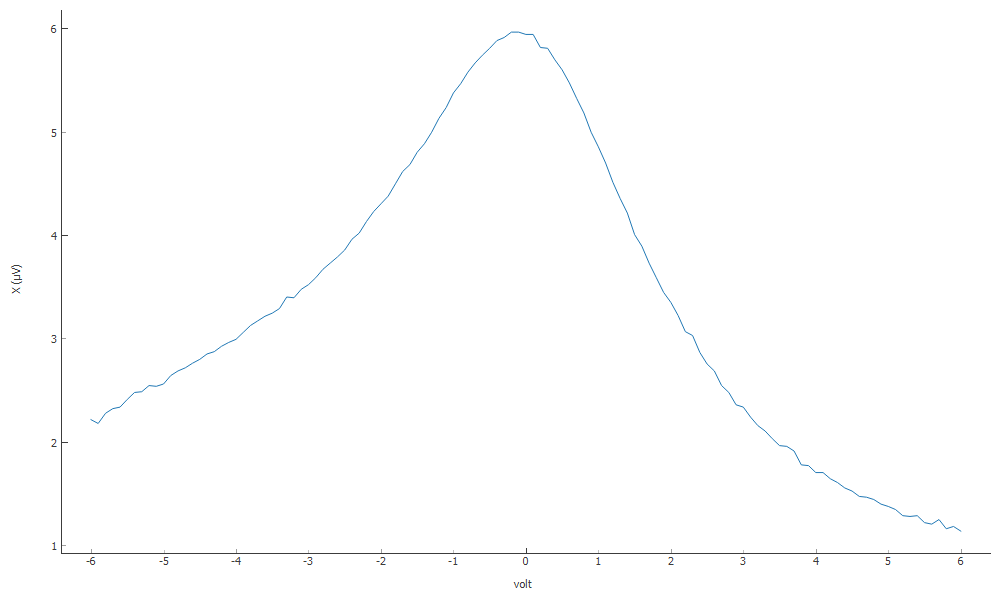

In [182]:
plot22[0]

In [193]:
srdc.volt(-6)
time.sleep(7)
gvals = np.linspace(-6, 6, 121)
data23, plot23 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_3-14_gsweep_20K_2nA')

Started at 2020-01-03 14:02:05
DataSet:
   location = 'data/2020-01-03/#004_M25_3-14_gsweep_20K_2nA_14-02-04'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (121,)
   Measured | lockin2_X     | X            | (121,)
   Measured | lockin2_Y     | Y            | (121,)
Finished at 2020-01-03 14:04:27


In [195]:
srdc.volt(-8)
time.sleep(7)
gvals = np.linspace(-8, 8, 161)
data24, plot24 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_3-14_gsweep_2K_2nA')
srdc.volt(0)

Started at 2020-01-03 14:12:44
DataSet:
   location = 'data/2020-01-03/#005_M25_3-14_gsweep_2K_2nA_14-12-43'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (161,)
   Measured | lockin2_X     | X            | (161,)
   Measured | lockin2_Y     | Y            | (161,)
Finished at 2020-01-03 14:15:52


In [196]:
srdc.volt(-8)
time.sleep(7)
gvals = np.linspace(-8, 8, 161)
data25, plot25 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_14-13_gsweep_2K_2nA')
srdc.volt(0)

Started at 2020-01-03 14:18:02
DataSet:
   location = 'data/2020-01-03/#006_M25_14-13_gsweep_2K_2nA_14-18-01'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (161,)
   Measured | lockin2_X     | X            | (161,)
   Measured | lockin2_Y     | Y            | (161,)
Finished at 2020-01-03 14:21:11


In [197]:
srdc.volt(-8)
time.sleep(7)
gvals = np.linspace(-8, 8, 161)
data26, plot26 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_13-12_gsweep_2K_2nA')
srdc.volt(0)

Started at 2020-01-03 14:22:58
DataSet:
   location = 'data/2020-01-03/#007_M25_13-12_gsweep_2K_2nA_14-22-57'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (161,)
   Measured | lockin2_X     | X            | (161,)
   Measured | lockin2_Y     | Y            | (161,)
Finished at 2020-01-03 14:26:06


In [220]:
srdc.volt(-0)

In [219]:
srdc.volt(-8)

In [206]:
srdc.volt(-15)
time.sleep(7)
gvals = np.linspace(-15, 15, 301)
data27, plot27 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M25_14-13_gsweep_1p8K_2nA')
srdc.volt(0)

Started at 2020-01-03 14:44:07
DataSet:
   location = 'data/2020-01-03/#008_M25_14-13_gsweep_1p8K_2nA_14-44-06'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (301,)
   Measured | lockin2_X     | X            | (301,)
   Measured | lockin2_Y     | Y            | (301,)
Finished at 2020-01-03 14:50:00


# M26 now

In [223]:
srdc.volt(-8)
time.sleep(7)
gvals = np.linspace(-8, 8, 161)
data28, plot28 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_11-10_gsweep_300K_1nA')
srdc.volt(0)

Started at 2020-01-03 16:07:47
DataSet:
   location = 'data/2020-01-03/#010_M26_11-10_gsweep_300K_1nA_16-07-46'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (161,)
   Measured | lockin2_X     | X            | (161,)
   Measured | lockin2_Y     | Y            | (161,)
Finished at 2020-01-03 16:10:56


In [225]:
srdc.volt(-8)
time.sleep(7)
gvals = np.linspace(-8, 8, 161)
data29, plot29 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_4-5_gsweep_250K_1nA')
srdc.volt(0)

Started at 2020-01-03 16:17:06
DataSet:
   location = 'data/2020-01-03/#012_M26_4-5_gsweep_250K_1nA_16-17-05'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (161,)
   Measured | lockin2_X     | X            | (161,)
   Measured | lockin2_Y     | Y            | (161,)
Finished at 2020-01-03 16:20:15


In [226]:
srdc.volt(8)
time.sleep(7)
gvals = np.linspace(8, 11, 31)
data30, plot30 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_4-5_gsweep_200K_1nA')
srdc.volt(0)

Started at 2020-01-03 16:21:20
DataSet:
   location = 'data/2020-01-03/#013_M26_4-5_gsweep_200K_1nA_16-21-19'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (31,)
   Measured | lockin2_X     | X            | (31,)
   Measured | lockin2_Y     | Y            | (31,)
Finished at 2020-01-03 16:21:57


In [227]:
srdc.volt(-8)
time.sleep(7)
gvals = np.linspace(-8, 10, 181)
data31, plot31 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_11-10_gsweep_130K_1nA')
srdc.volt(0)

Started at 2020-01-03 16:26:28
DataSet:
   location = 'data/2020-01-03/#014_M26_11-10_gsweep_130K_1nA_16-26-26'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (181,)
   Measured | lockin2_X     | X            | (181,)
   Measured | lockin2_Y     | Y            | (181,)
Finished at 2020-01-03 16:30:00


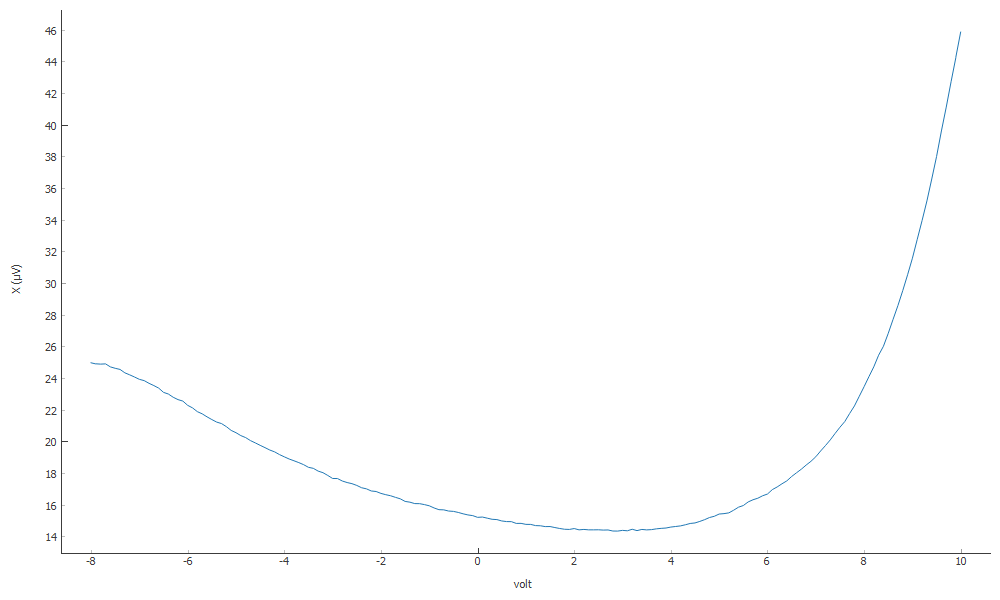

In [228]:
plot31[0]

In [229]:
srdc.volt(-10)
time.sleep(7)
gvals = np.linspace(-10, 11, 211)
data32, plot32 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_11-10_gsweep_4K_1nA')
srdc.volt(0)

Started at 2020-01-03 16:44:51
DataSet:
   location = 'data/2020-01-03/#015_M26_11-10_gsweep_4K_1nA_16-44-50'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (211,)
   Measured | lockin2_X     | X            | (211,)
   Measured | lockin2_Y     | Y            | (211,)
Finished at 2020-01-03 16:48:58


In [230]:
srdc.volt(-10)
time.sleep(7)
gvals = np.linspace(-13, 14, 271)
data33, plot33 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_11-10_gsweep_1p9K_1nA')
srdc.volt(0)

Started at 2020-01-03 16:52:42
DataSet:
   location = 'data/2020-01-03/#016_M26_11-10_gsweep_1p9K_1nA_16-52-41'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-03 16:58:05


In [234]:
srdc.volt(0.115)

In [235]:
srdc.volt(-13)
time.sleep(7)
gvals = np.linspace(-13, 14, 271)
data34, plot34 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_gsweep_1p8K_1nA')
srdc.volt(0)

Started at 2020-01-03 17:21:45
DataSet:
   location = 'data/2020-01-03/#017_M26_10-9_gsweep_1p8K_1nA_17-21-44'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-03 17:27:02


<IPython.core.display.Javascript object>


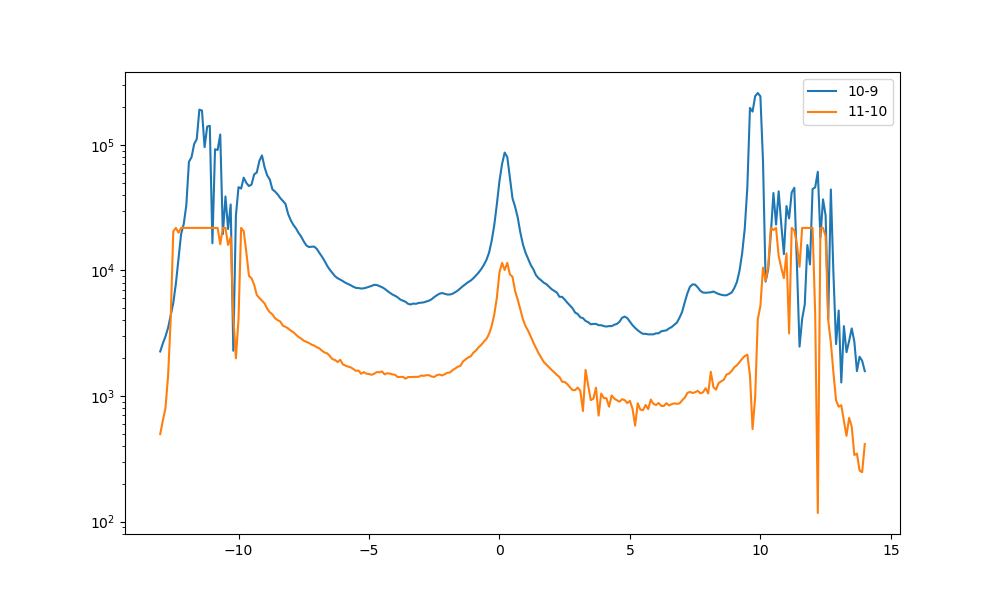

In [237]:
plt.figure(figsize=(10, 6))
plt.semilogy(data34.srdc_volt_set[:], np.abs(data34.lockin2_X[:])/1e-9, label= '10-9')
plt.semilogy(data33.srdc_volt_set[:], np.abs(data33.lockin2_X[:])/5e-9, label= '11-10')
plt.legend()

In [238]:
srdc.volt(-10)
time.sleep(7)
gvals = np.linspace(-10, 10, 201)
data35, plot35 = npd.single_param_sweep(srdc.volt, gvals, 1.5, lockin2.X, lockin2.Y, DataName='M26_13-11_gsweep_1p8K_0.4nA')
srdc.volt(0)

Started at 2020-01-03 17:33:43
DataSet:
   location = 'data/2020-01-03/#018_M26_13-11_gsweep_1p8K_0.4nA_17-33-42'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-03 17:39:18


In [239]:
srdc.volt(-13)
time.sleep(7)
gvals = np.linspace(-13, 14, 271)
data34, plot34 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_5-6_gsweep_1p8K_1nA')
srdc.volt(0)

Started at 2020-01-03 17:43:58
DataSet:
   location = 'data/2020-01-03/#019_M26_5-6_gsweep_1p8K_1nA_17-43-57'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-03 17:49:15


<IPython.core.display.Javascript object>


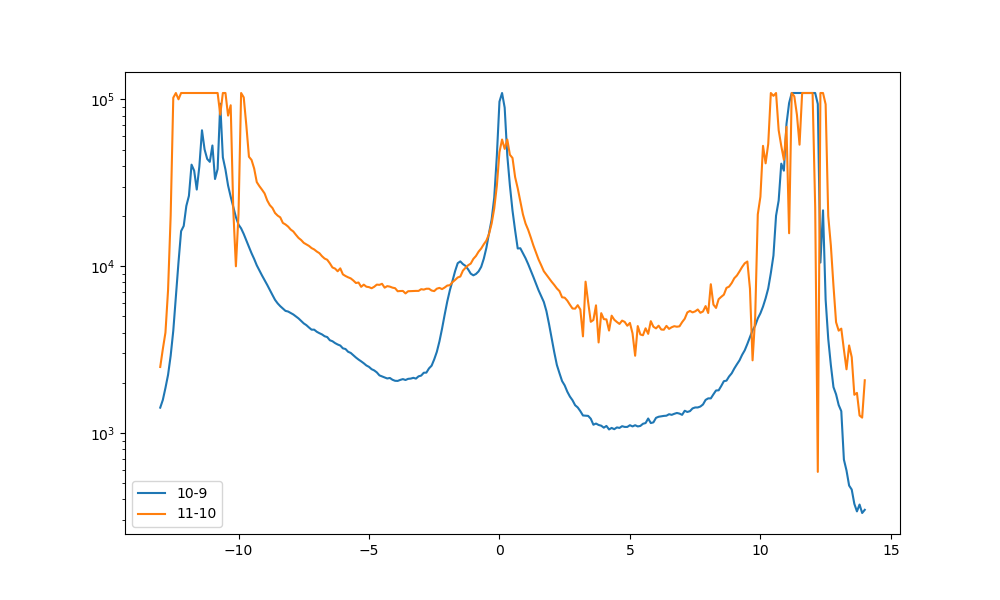

In [241]:
plt.figure(figsize=(10, 6))
plt.semilogy(data34.srdc_volt_set[:], np.abs(data34.lockin2_X[:])/1e-9, label= '10-9')
plt.semilogy(data33.srdc_volt_set[:], np.abs(data33.lockin2_X[:])/1e-9, label= '11-10')
plt.legend()

In [242]:
datatest1 = qc.load_data('data/2020-01-03/#017_M26_10-9_gsweep_1p8K_1nA_17-21-44')

In [245]:
abc=datatest1.lockin2_X

<IPython.core.display.Javascript object>


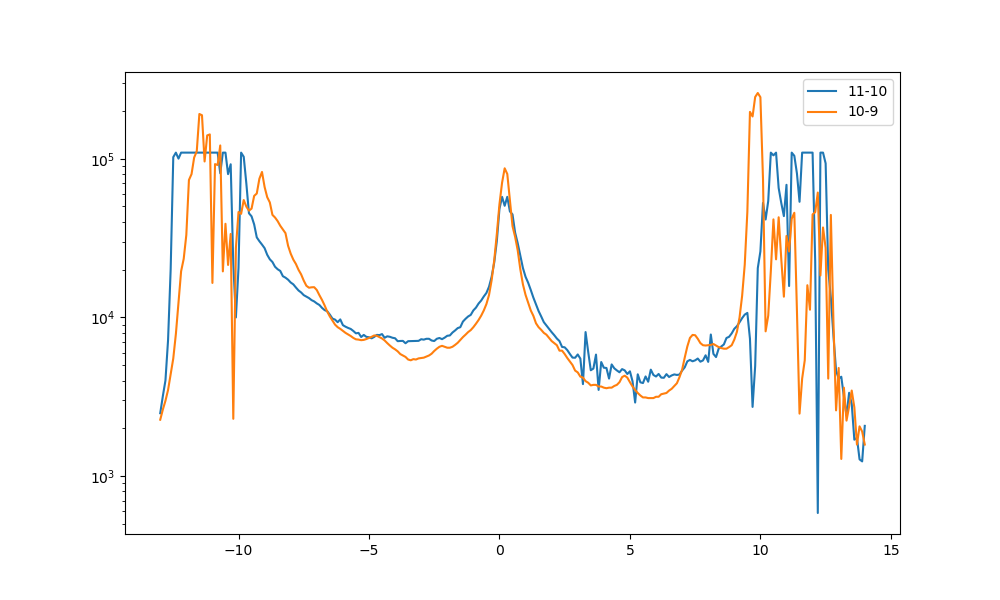

In [253]:
plt.figure(figsize=(10, 6))
#plt.semilogy(data34.srdc_volt_set[:], np.abs(data34.lockin2_X[:])/1e-9, label= '5-6')
plt.semilogy(data33.srdc_volt_set[:], np.abs(data33.lockin2_X[:])/1e-9, label= '11-10')
plt.semilogy(data33.srdc_volt_set[:], np.abs(abc[:])/1e-9, label= '10-9')
plt.legend()

In [258]:
lockin1.X()

-1.1921e-07

In [261]:
srdc.volt(0.23)

In [262]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data36, plot36 = npd.single_param_sweep(srdc.volt, gvals, 2.1, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_11-13_lockin1_gsweep_1p8K_5nA')
srdc.volt(0)

Started at 2020-01-03 19:01:33
DataSet:
   location = 'data/2020-01-03/#020_M26_10-9_lockin2_11-13_lockin1_gsweep_1p8K_5nA_19-01-31'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin1_X     | X            | (271,)
   Measured | lockin1_Y     | Y            | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-03 19:12:07


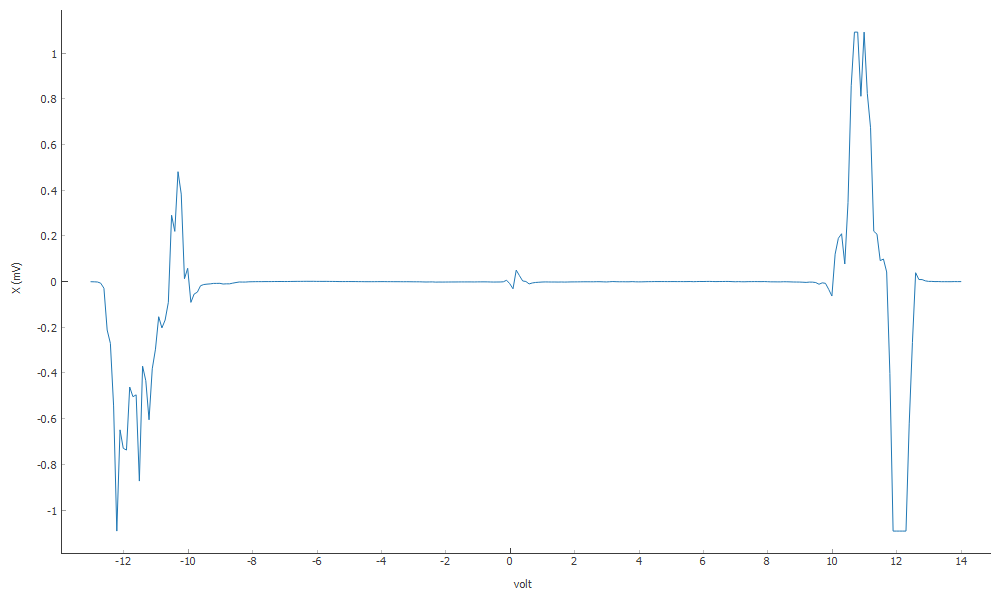

In [263]:
plot36[0]

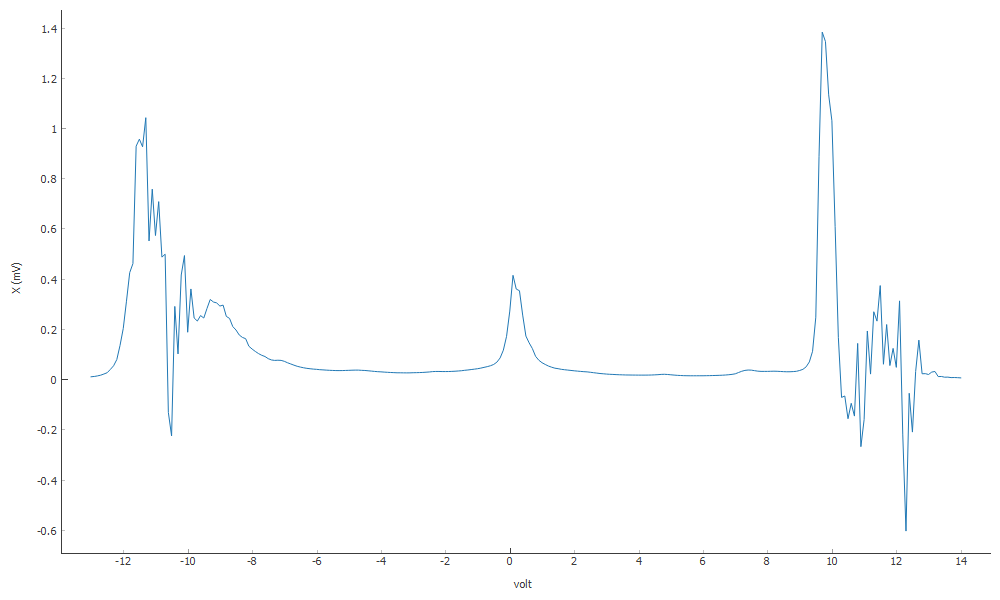

In [264]:
plot36[2]

<IPython.core.display.Javascript object>


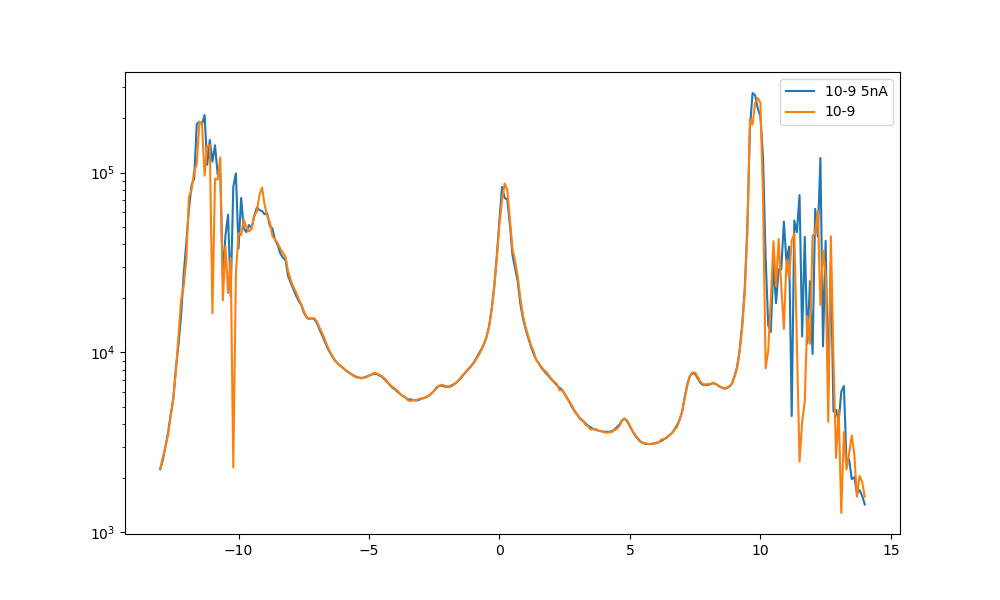

In [265]:
plt.figure(figsize=(10, 6))
plt.semilogy(data36.srdc_volt_set[:], np.abs(data36.lockin2_X[:])/5e-9, label= '10-9 5nA')
plt.semilogy(data33.srdc_volt_set[:], np.abs(abc[:])/1e-9, label= '10-9')
plt.legend()

In [273]:
gvals = np.linspace(-10, 11, 841)  # negative gate voltage (hole side)
fieldvals = np.linspace(0, 9000, 181)
data37, plot37 = npd.twod_param_sweep(ppms.field_set_stable, fieldvals, srdc.volt, gvals, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, SetDelay1=10, SetDelay2=0.7, Param2_SetBetween=-8, DataName='M26_10-9_lockin2_11-13_lockin1_Fan0Tto9T_1p8K_5nA')
srdc.volt(0)

Started at 2020-01-03 22:17:31
DataSet:
   location = 'data/2020-01-03/#022_M26_10-9_lockin2_11-13_lockin1_Fan0Tto9T_1p8K_5nA_22-17-28'
   <Type>   | <array_id>                | <array.name>     | <array.shape>
   Setpoint | ppms_field_set_stable_set | field_set_stable | (181,)
   Setpoint | srdc_volt_set             | volt             | (181, 841)
   Measured | lockin1_X                 | X                | (181, 841)
   Measured | lockin1_Y                 | Y                | (181, 841)
   Measured | lockin2_X                 | X                | (181, 841)
   Measured | lockin2_Y                 | Y                | (181, 841)
Finished at 2020-01-05 09:35:32


In [272]:
lockin1.time_constant()

0.1

In [271]:
lockin2.time_constant()

0.1

In [274]:
gvals = np.linspace(-10, 11, 841)  # negative gate voltage (hole side)
fieldvals = np.linspace(-500, -1000, 20)
data38, plot38 = npd.twod_param_sweep(ppms.field_set_stable, fieldvals, srdc.volt, gvals, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, SetDelay1=10, SetDelay2=0.7, Param2_SetBetween=-8, DataName='M26_10-9_lockin2_11-13_lockin1_Fan-50mTto-1T_1p8K_5nA')
srdc.volt(0)

Started at 2020-01-05 09:35:53
DataSet:
   location = 'data/2020-01-05/#001_M26_10-9_lockin2_11-13_lockin1_Fan-50mTto-1T_1p8K_5nA_09-35-50'
   <Type>   | <array_id>                | <array.name>     | <array.shape>
   Setpoint | ppms_field_set_stable_set | field_set_stable | (20,)
   Setpoint | srdc_volt_set             | volt             | (20, 841)
   Measured | lockin1_X                 | X                | (20, 841)
   Measured | lockin1_Y                 | Y                | (20, 841)
   Measured | lockin2_X                 | X                | (20, 841)
   Measured | lockin2_Y                 | Y                | (20, 841)
Finished at 2020-01-05 13:40:32


In [276]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data39, plot39 = npd.single_param_sweep(srdc.volt, gvals, 2.1, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='M26_13-12_lockin2_2point_gsweep_1p8K_5nA')
srdc.volt(0)

Started at 2020-01-05 14:21:31
DataSet:
   location = 'data/2020-01-05/#003_M26_13-12_lockin2_2point_gsweep_1p8K_5nA_14-21-29'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin1_X     | X            | (271,)
   Measured | lockin1_Y     | Y            | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 14:32:05


<IPython.core.display.Javascript object>


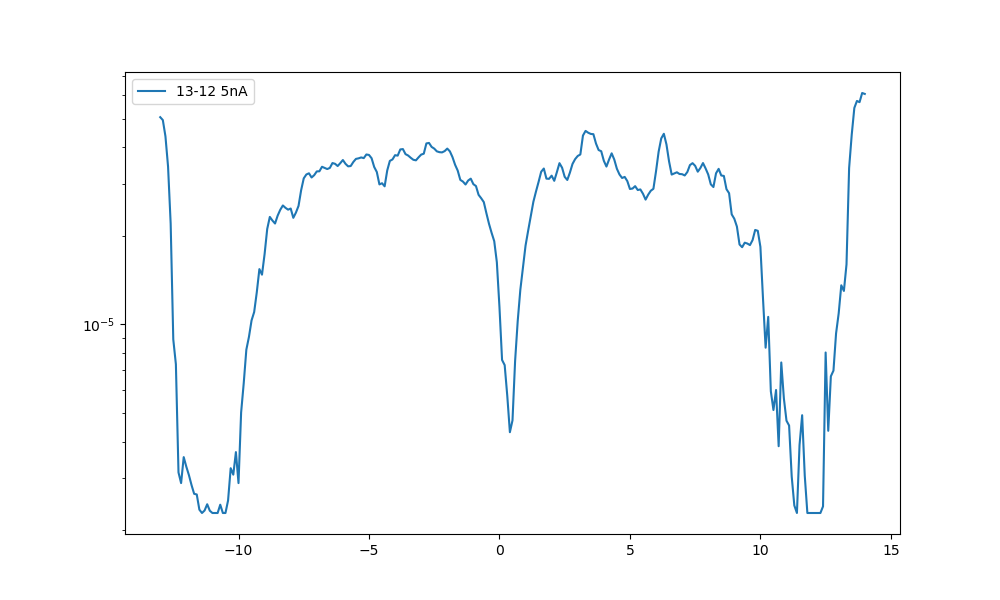

In [277]:
plt.figure(figsize=(10, 6))
plt.semilogy(data36.srdc_volt_set[:], 1/(np.abs(data39.lockin2_X[:])/5e-9), label= '13-12 5nA')
plt.legend()

In [280]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data40, plot40 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_13-11_lockin2_2point_gsweep_10K_2nA')
srdc.volt(0)

Started at 2020-01-05 14:50:04
DataSet:
   location = 'data/2020-01-05/#006_M26_13-11_lockin2_2point_gsweep_10K_2nA_14-50-03'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 14:55:23


<IPython.core.display.Javascript object>


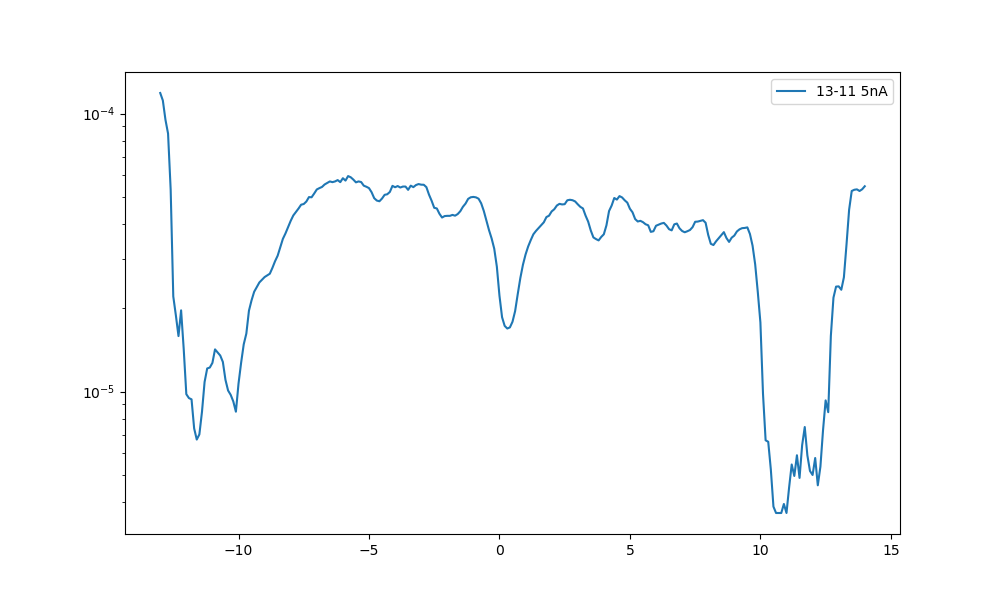

In [281]:
plt.figure(figsize=(10, 6))
plt.semilogy(data40.srdc_volt_set[:], 1/(np.abs(data40.lockin2_X[:])/2e-9), label= '13-11 5nA')
plt.legend()

In [283]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data41, plot41 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='M26_13-12_lockin2_2point_gsweep_10K_2nA')
srdc.volt(0)

Started at 2020-01-05 14:59:25
DataSet:
   location = 'data/2020-01-05/#007_M26_13-12_lockin2_2point_gsweep_10K_2nA_14-59-23'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin1_X     | X            | (271,)
   Measured | lockin1_Y     | Y            | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:05:02


<IPython.core.display.Javascript object>


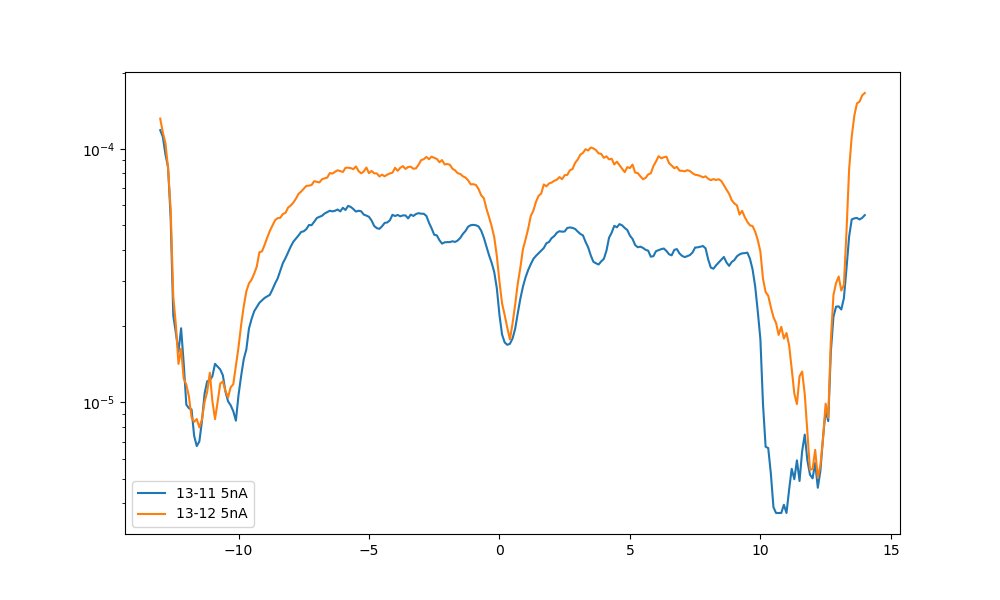

In [284]:
plt.figure(figsize=(10, 6))
plt.semilogy(data40.srdc_volt_set[:], 1/(np.abs(data40.lockin2_X[:])/2e-9), label= '13-11 5nA')
plt.semilogy(data41.srdc_volt_set[:], 1/(np.abs(data41.lockin2_X[:])/2e-9), label= '13-12 5nA')
plt.legend()

In [287]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data42, plot42 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-11_lockin2_2point_gsweep_10K_2nA')
srdc.volt(0)

Started at 2020-01-05 15:06:44
DataSet:
   location = 'data/2020-01-05/#008_M26_10-11_lockin2_2point_gsweep_10K_2nA_15-06-43'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:12:01


In [288]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data42, plot42 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_12-10_lockin2_2point_gsweep_10K_2nA')
srdc.volt(0)

Started at 2020-01-05 15:13:14
DataSet:
   location = 'data/2020-01-05/#009_M26_12-10_lockin2_2point_gsweep_10K_2nA_15-13-13'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:18:31


<IPython.core.display.Javascript object>


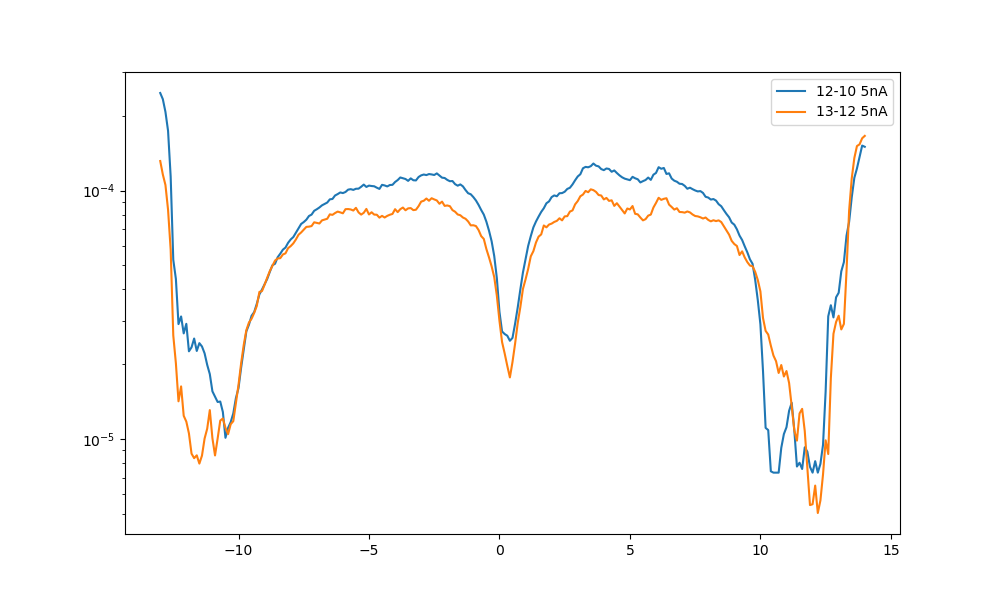

In [290]:
plt.figure(figsize=(10, 6))
plt.semilogy(data42.srdc_volt_set[:], 1/(np.abs(data42.lockin2_X[:])/4e-9), label= '12-10 5nA')
plt.semilogy(data41.srdc_volt_set[:], 1/(np.abs(data41.lockin2_X[:])/2e-9), label= '13-12 5nA')
plt.legend()

In [291]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data43, plot43 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_9-10_lockin2_2point_gsweep_10K_2nA')
srdc.volt(0)

Started at 2020-01-05 15:20:42
DataSet:
   location = 'data/2020-01-05/#010_M26_9-10_lockin2_2point_gsweep_10K_2nA_15-20-41'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:26:00


<IPython.core.display.Javascript object>


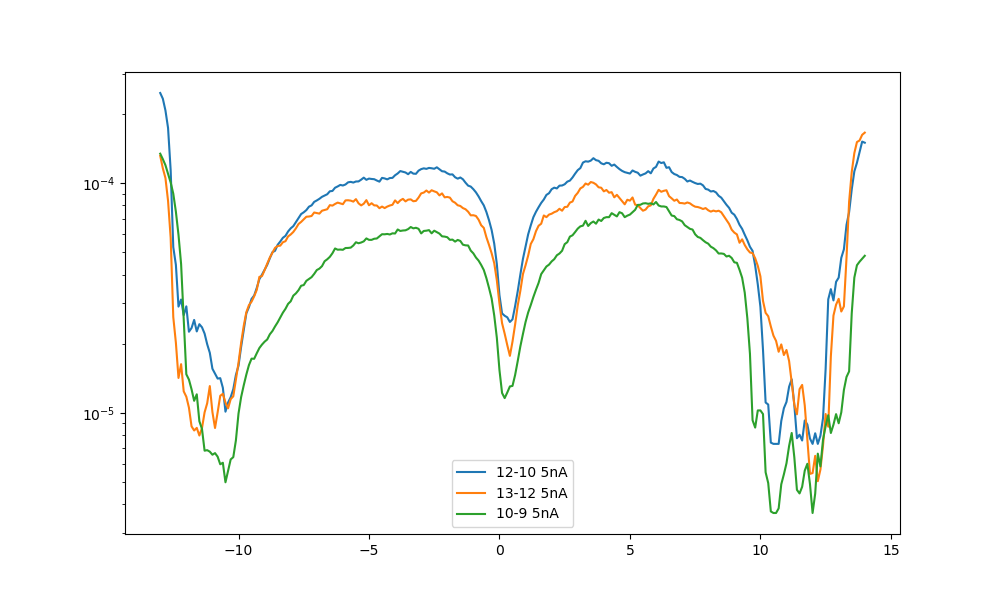

In [292]:
plt.figure(figsize=(10, 6))
plt.semilogy(data42.srdc_volt_set[:], 1/(np.abs(data42.lockin2_X[:])/4e-9), label= '12-10 5nA')
plt.semilogy(data41.srdc_volt_set[:], 1/(np.abs(data41.lockin2_X[:])/2e-9), label= '13-12 5nA')
plt.semilogy(data43.srdc_volt_set[:], 1/(np.abs(data43.lockin2_X[:])/2e-9), label= '10-9 5nA')
plt.legend()

In [293]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data44, plot44 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_9-8_lockin2_2point_gsweep_10K_2nA')
srdc.volt(0)

Started at 2020-01-05 15:27:47
DataSet:
   location = 'data/2020-01-05/#011_M26_9-8_lockin2_2point_gsweep_10K_2nA_15-27-46'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:33:04


<IPython.core.display.Javascript object>


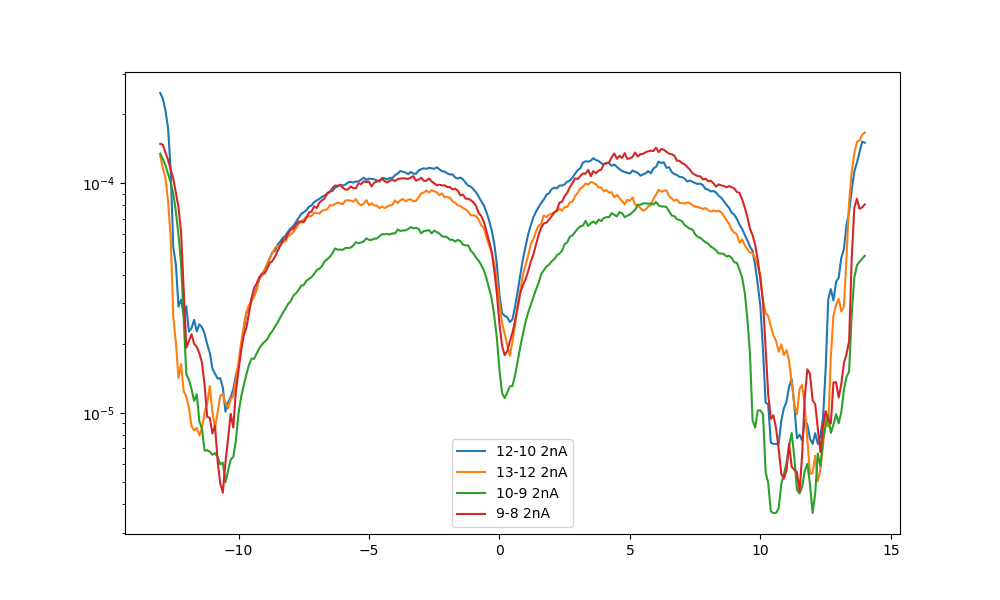

In [294]:
plt.figure(figsize=(10, 6))
plt.semilogy(data42.srdc_volt_set[:], 1/(np.abs(data42.lockin2_X[:])/4e-9), label= '12-10 2nA')
plt.semilogy(data41.srdc_volt_set[:], 1/(np.abs(data41.lockin2_X[:])/2e-9), label= '13-12 2nA')
plt.semilogy(data43.srdc_volt_set[:], 1/(np.abs(data43.lockin2_X[:])/2e-9), label= '10-9 2nA')
plt.semilogy(data44.srdc_volt_set[:], 1/(np.abs(data44.lockin2_X[:])/2e-9), label= '9-8 2nA')
plt.legend()

In [295]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data45, plot45 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_13-10_lockin2_hystreristest0T_gsweep_2K_1nA')
srdc.volt(0)

Started at 2020-01-05 15:38:28
DataSet:
   location = 'data/2020-01-05/#012_M26_13-10_lockin2_hystreristest0T_gsweep_2K_1nA_15-38-27'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:43:45


In [296]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data46, plot46 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_13-10_lockin2_hystreristest0Tafter+1T_gsweep_2K_1nA')
srdc.volt(0)

Started at 2020-01-05 15:46:40
DataSet:
   location = 'data/2020-01-05/#013_M26_13-10_lockin2_hystreristest0Tafter+1T_gsweep_2K_1nA_15-46-39'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:51:57


<IPython.core.display.Javascript object>


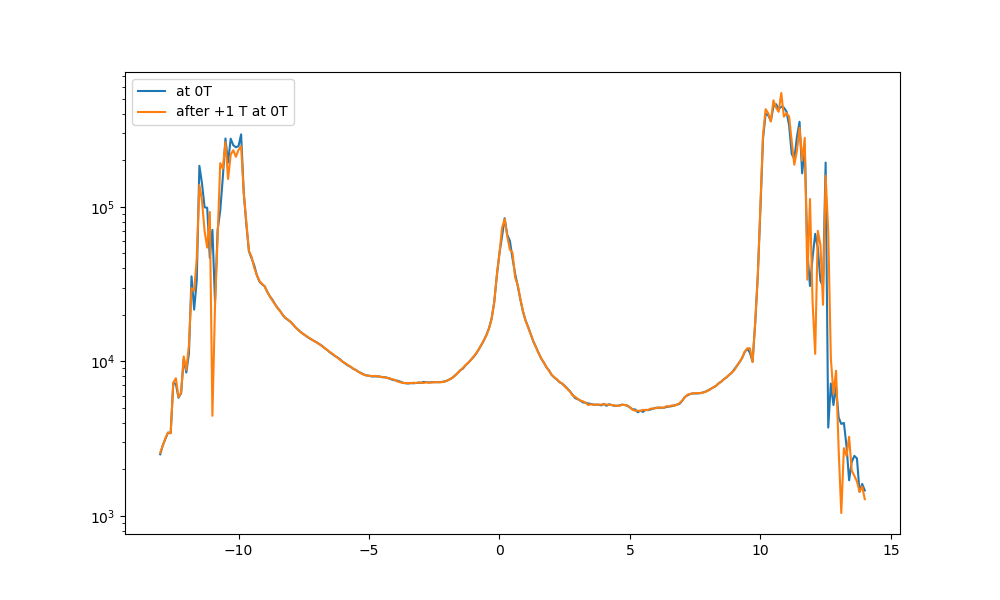

In [297]:
plt.figure(figsize=(10, 6))
plt.semilogy(data45.srdc_volt_set[:], (np.abs(data45.lockin2_X[:])/1e-9), label= 'at 0T')
plt.semilogy(data46.srdc_volt_set[:], (np.abs(data46.lockin2_X[:])/1e-9), label= 'after +1 T at 0T')
plt.legend()

In [298]:
srdc.volt(-13)
time.sleep(10)
gvals = np.linspace(-13, 14, 271)
data47, plot47 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_13-10_lockin2_hystreristest0Tafter-1T_gsweep_2K_1nA')
srdc.volt(0)

Started at 2020-01-05 15:54:30
DataSet:
   location = 'data/2020-01-05/#014_M26_13-10_lockin2_hystreristest0Tafter-1T_gsweep_2K_1nA_15-54-29'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (271,)
   Measured | lockin2_X     | X            | (271,)
   Measured | lockin2_Y     | Y            | (271,)
Finished at 2020-01-05 15:59:48


<IPython.core.display.Javascript object>


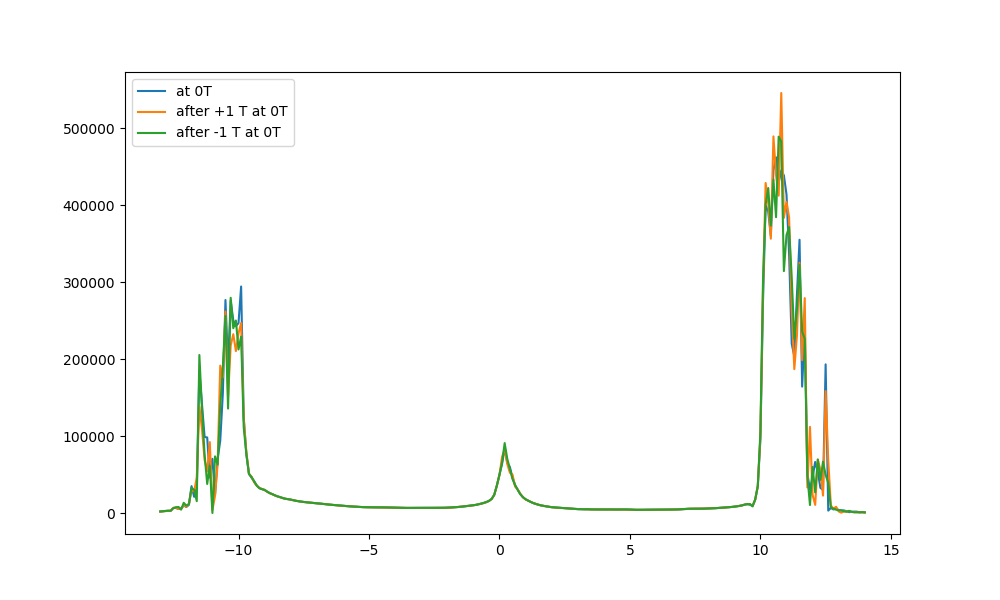

In [300]:
plt.figure(figsize=(10, 6))
plt.plot(data45.srdc_volt_set[:], (np.abs(data45.lockin2_X[:])/1e-9), label= 'at 0T')
plt.plot(data46.srdc_volt_set[:], (np.abs(data46.lockin2_X[:])/1e-9), label= 'after +1 T at 0T')
plt.plot(data47.srdc_volt_set[:], (np.abs(data47.lockin2_X[:])/1e-9), label= 'after -1 T at 0T')
plt.legend()

In [301]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data48, plot48 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_1.5K_0.5nA')
srdc.volt(0)

Started at 2020-01-05 16:04:35
DataSet:
   location = 'data/2020-01-05/#015_M26_10-9_lockin2_gsweep_1.5K_0.5nA_16-04-34'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:08:31


In [302]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data49, plot49 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_3K_0.5nA')
srdc.volt(0)

Started at 2020-01-05 16:09:26
DataSet:
   location = 'data/2020-01-05/#016_M26_10-9_lockin2_gsweep_3K_0.5nA_16-09-25'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:13:22


<IPython.core.display.Javascript object>


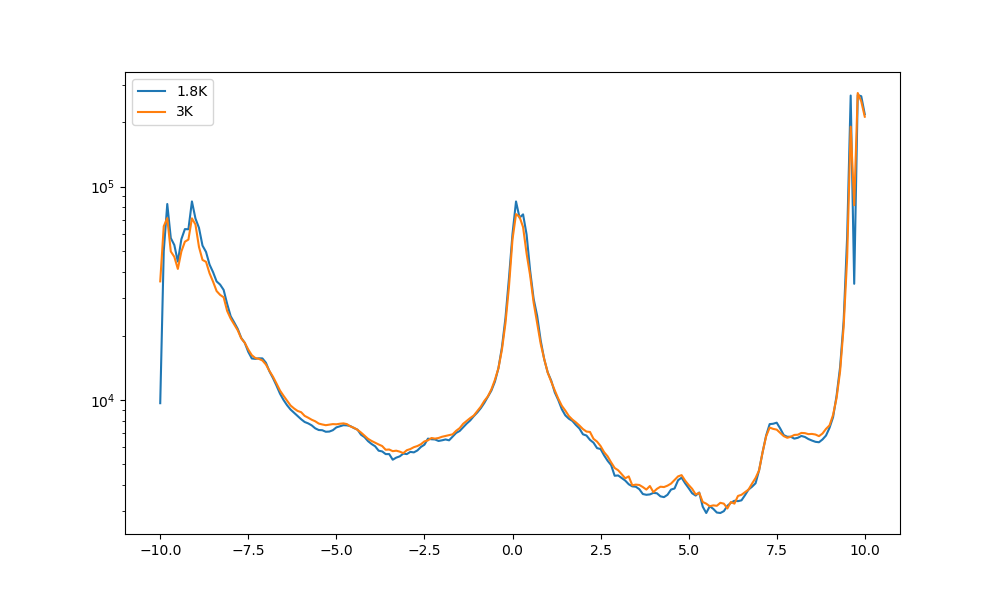

In [303]:
plt.figure(figsize=(10, 6))
plt.semilogy(data48.srdc_volt_set[:], (np.abs(data48.lockin2_X[:])/0.5e-9), label= '1.8K')
plt.semilogy(data49.srdc_volt_set[:], (np.abs(data49.lockin2_X[:])/0.5e-9), label= '3K')
plt.legend()

In [304]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data50, plot50 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_5K_0.5nA')
srdc.volt(0)

Started at 2020-01-05 16:15:08
DataSet:
   location = 'data/2020-01-05/#017_M26_10-9_lockin2_gsweep_5K_0.5nA_16-15-07'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:19:03


<IPython.core.display.Javascript object>


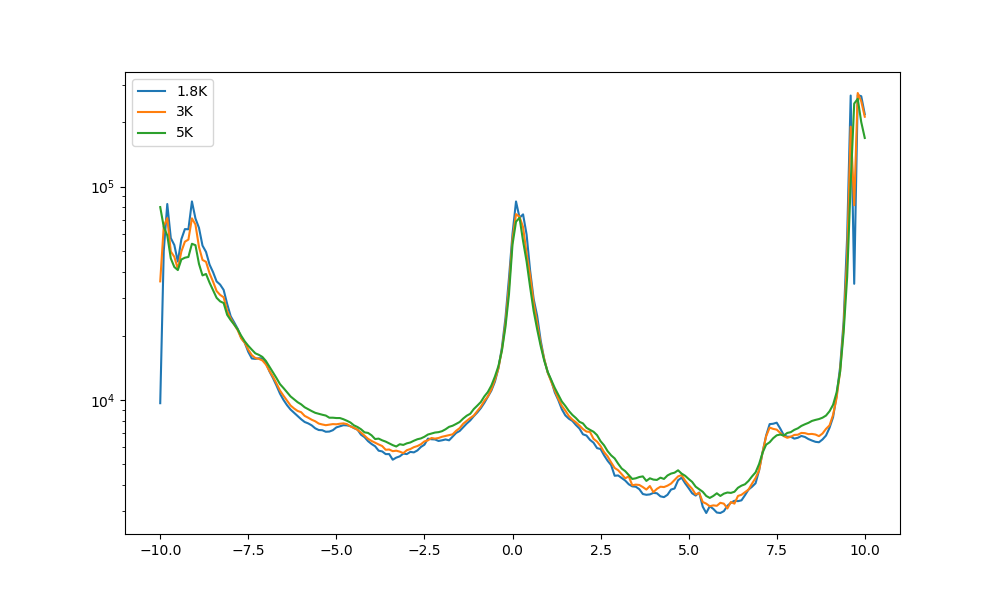

In [305]:
plt.figure(figsize=(10, 6))
plt.semilogy(data48.srdc_volt_set[:], (np.abs(data48.lockin2_X[:])/0.5e-9), label= '1.8K')
plt.semilogy(data49.srdc_volt_set[:], (np.abs(data49.lockin2_X[:])/0.5e-9), label= '3K')
plt.semilogy(data50.srdc_volt_set[:], (np.abs(data50.lockin2_X[:])/0.5e-9), label= '5K')
plt.legend()

In [306]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data51, plot51 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_7K_0.5nA')
srdc.volt(0)

Started at 2020-01-05 16:20:43
DataSet:
   location = 'data/2020-01-05/#018_M26_10-9_lockin2_gsweep_7K_0.5nA_16-20-42'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:24:39


<IPython.core.display.Javascript object>


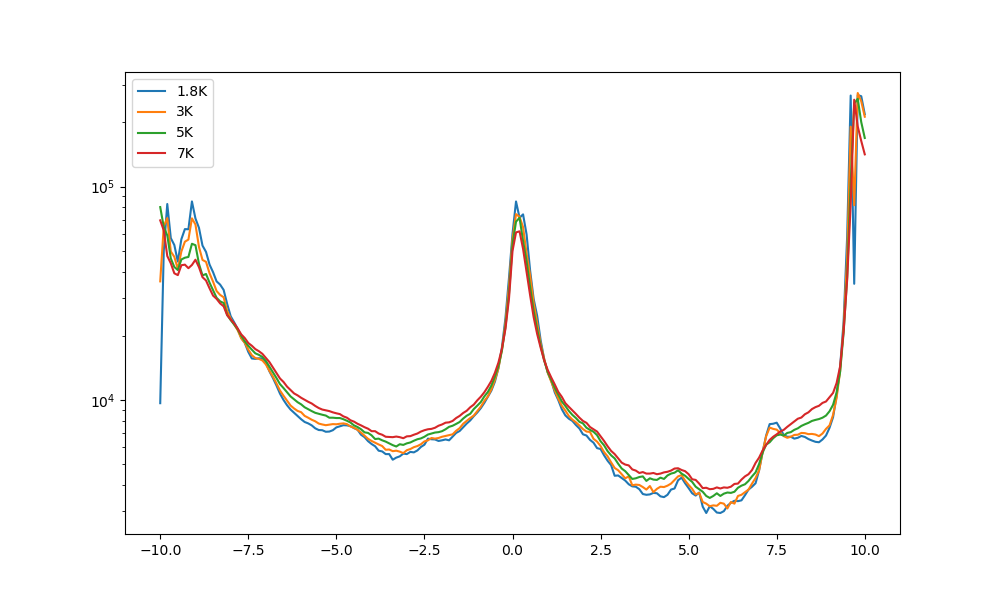

In [307]:
plt.figure(figsize=(10, 6))
plt.semilogy(data48.srdc_volt_set[:], (np.abs(data48.lockin2_X[:])/0.5e-9), label= '1.8K')
plt.semilogy(data49.srdc_volt_set[:], (np.abs(data49.lockin2_X[:])/0.5e-9), label= '3K')
plt.semilogy(data50.srdc_volt_set[:], (np.abs(data50.lockin2_X[:])/0.5e-9), label= '5K')
plt.semilogy(data51.srdc_volt_set[:], (np.abs(data51.lockin2_X[:])/0.5e-9), label= '7K')
plt.legend()

In [308]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data52, plot52 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_9K_0.5nA')
srdc.volt(0)

Started at 2020-01-05 16:25:34
DataSet:
   location = 'data/2020-01-05/#019_M26_10-9_lockin2_gsweep_9K_0.5nA_16-25-33'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:29:29


<IPython.core.display.Javascript object>


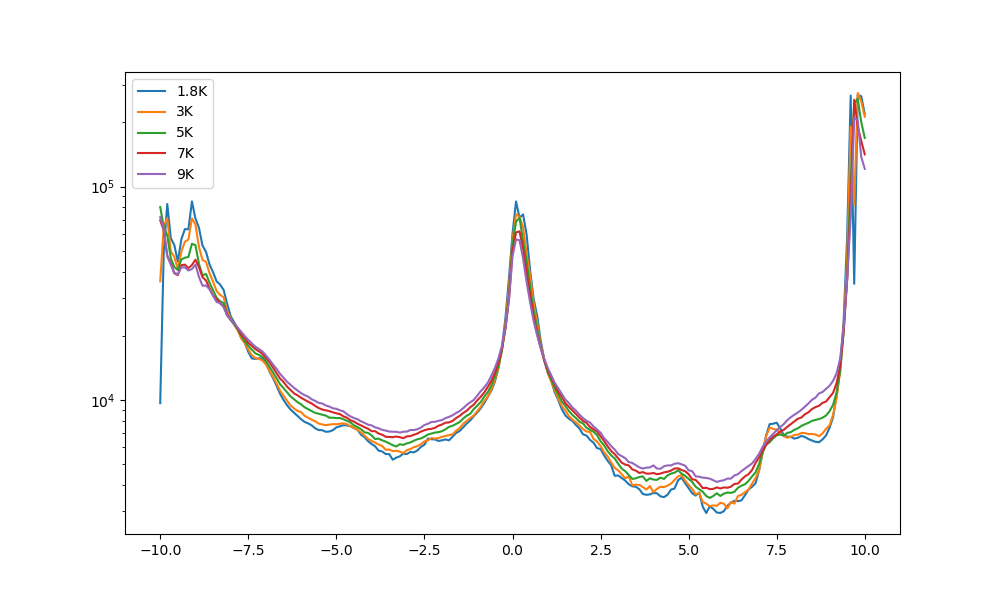

In [309]:
plt.figure(figsize=(10, 6))
plt.semilogy(data48.srdc_volt_set[:], (np.abs(data48.lockin2_X[:])/0.5e-9), label= '1.8K')
plt.semilogy(data49.srdc_volt_set[:], (np.abs(data49.lockin2_X[:])/0.5e-9), label= '3K')
plt.semilogy(data50.srdc_volt_set[:], (np.abs(data50.lockin2_X[:])/0.5e-9), label= '5K')
plt.semilogy(data51.srdc_volt_set[:], (np.abs(data51.lockin2_X[:])/0.5e-9), label= '7K')
plt.semilogy(data52.srdc_volt_set[:], (np.abs(data52.lockin2_X[:])/0.5e-9), label= '9K')
plt.legend()

In [310]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data53, plot53 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_1.8K_20nA')
srdc.volt(0)

Started at 2020-01-05 16:37:02
DataSet:
   location = 'data/2020-01-05/#020_M26_10-9_lockin2_gsweep_1.8K_20nA_16-37-01'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:40:58


<IPython.core.display.Javascript object>


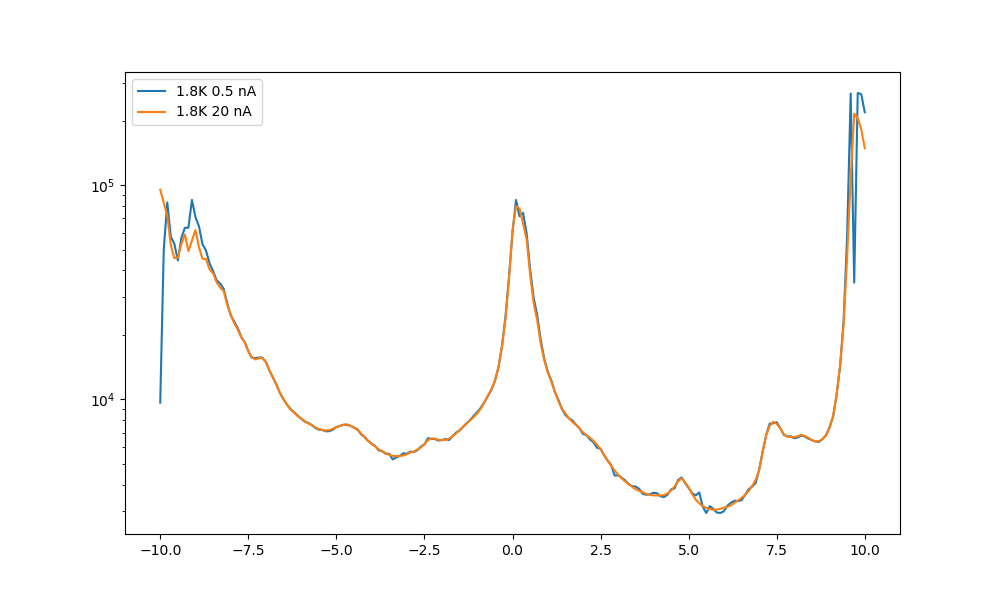

In [311]:
plt.figure(figsize=(10, 6))
plt.semilogy(data48.srdc_volt_set[:], (np.abs(data48.lockin2_X[:])/0.5e-9), label= '1.8K 0.5 nA')
plt.semilogy(data53.srdc_volt_set[:], (np.abs(data53.lockin2_X[:])/20e-9), label= '1.8K 20 nA')
plt.legend()

In [312]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data54, plot54 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_11-10_lockin2_gsweep_1.8K_20nA')
srdc.volt(0)

Started at 2020-01-05 16:44:14
DataSet:
   location = 'data/2020-01-05/#021_M26_11-10_lockin2_gsweep_1.8K_20nA_16-44-13'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:48:09


<IPython.core.display.Javascript object>


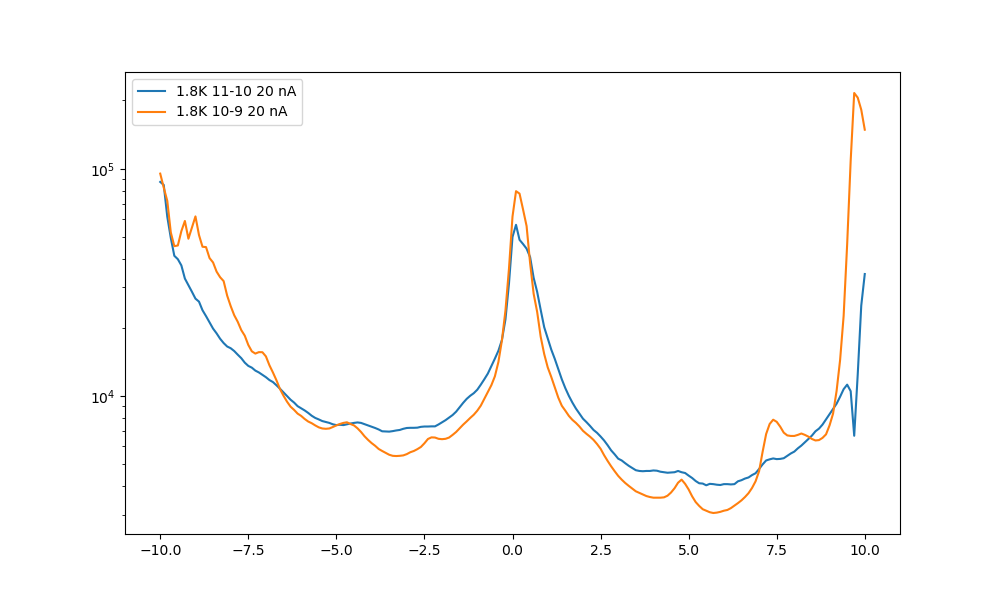

In [313]:
plt.figure(figsize=(10, 6))
plt.semilogy(data54.srdc_volt_set[:], (np.abs(data54.lockin2_X[:])/20e-9), label= '1.8K 11-10 20 nA')
plt.semilogy(data53.srdc_volt_set[:], (np.abs(data53.lockin2_X[:])/20e-9), label= '1.8K 10-9 20 nA')
plt.legend()

In [314]:
srdc.volt(-10)
time.sleep(10)
gvals = np.linspace(-10, 10, 201)
data55, plot55 = npd.single_param_sweep(srdc.volt, gvals, 1, lockin2.X, lockin2.Y, DataName='M26_10-9_lockin2_gsweep_1.8K_10nA')
srdc.volt(0)

Started at 2020-01-05 16:51:53
DataSet:
   location = 'data/2020-01-05/#022_M26_10-9_lockin2_gsweep_1.8K_10nA_16-51-52'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | srdc_volt_set | volt         | (201,)
   Measured | lockin2_X     | X            | (201,)
   Measured | lockin2_Y     | Y            | (201,)
Finished at 2020-01-05 16:55:49


<IPython.core.display.Javascript object>


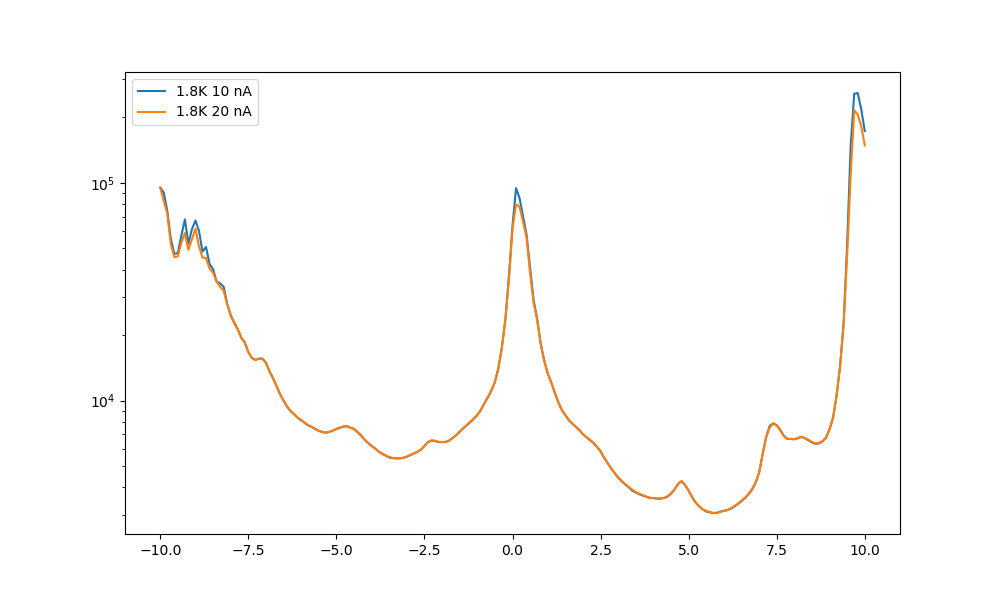

In [315]:
plt.figure(figsize=(10, 6))
plt.semilogy(data55.srdc_volt_set[:], (np.abs(data55.lockin2_X[:])/10e-9), label= '1.8K 10 nA')
plt.semilogy(data53.srdc_volt_set[:], (np.abs(data53.lockin2_X[:])/20e-9), label= '1.8K 20 nA')
plt.legend()

In [316]:
Tvals = np.linspace(2, 20, 19)
gvals = np.linspace(-13, 14, 541)
data56, plot56 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, srdc.volt, gvals, lockin2.X, lockin2.Y, SetDelay1=7, SetDelay2=1, Param2_SetBetween=-3, DataName='M26_10-9_temp_gsweep_2to20K_10nA')

Started at 2020-01-05 16:57:18
Temperature timeout
DataSet:
   location = 'data/2020-01-05/#023_M26_10-9_temp_gsweep_2to20K_10nA_16-57-16'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (19,)
   Setpoint | srdc_volt_set                   | volt                   | (19, 541)
   Measured | lockin2_X                       | X                      | (19, 541)
   Measured | lockin2_Y                       | Y                      | (19, 541)
Finished at 2020-01-05 20:42:28


In [317]:
Tvals = np.linspace(22, 118, 49)
gvals = np.linspace(-13, 14, 541)
data57, plot57 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, srdc.volt, gvals, lockin2.X, lockin2.Y, SetDelay1=7, SetDelay2=1, Param2_SetBetween=-3, DataName='M26_10-9_temp_gsweep_22to118K_10nA')

Started at 2020-01-05 20:42:31
DataSet:
   location = 'data/2020-01-05/#024_M26_10-9_temp_gsweep_22to118K_10nA_20-42-29'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (49,)
   Setpoint | srdc_volt_set                   | volt                   | (49, 541)
   Measured | lockin2_X                       | X                      | (49, 541)
   Measured | lockin2_Y                       | Y                      | (49, 541)
Finished at 2020-01-06 06:19:30


In [318]:
Tvals = np.linspace(120, 175, 12)
gvals = np.linspace(-13, 14, 541)
data58, plot58 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, srdc.volt, gvals, lockin2.X, lockin2.Y, SetDelay1=7, SetDelay2=1, Param2_SetBetween=-3, DataName='M26_10-9_temp_gsweep_120to175K_10nA')
srdc.volt(0)

Started at 2020-01-06 06:19:32
DataSet:
   location = 'data/2020-01-06/#001_M26_10-9_temp_gsweep_120to175K_10nA_06-19-30'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (12,)
   Setpoint | srdc_volt_set                   | volt                   | (12, 541)
   Measured | lockin2_X                       | X                      | (12, 541)
   Measured | lockin2_Y                       | Y                      | (12, 541)
Finished at 2020-01-06 08:45:05


In [319]:
Tvals = np.linspace(180, 200, 5)
gvals = np.linspace(-13, 14, 541)
data59, plot59 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, srdc.volt, gvals, lockin2.X, lockin2.Y, SetDelay1=7, SetDelay2=1, Param2_SetBetween=-3, DataName='M26_10-9_temp_gsweep_180to200K_10nA')
srdc.volt(0)

Started at 2020-01-06 09:31:50
DataSet:
   location = 'data/2020-01-06/#002_M26_10-9_temp_gsweep_180to200K_10nA_09-31-48'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (5,)
   Setpoint | srdc_volt_set                   | volt                   | (5, 541)
   Measured | lockin2_X                       | X                      | (5, 541)
   Measured | lockin2_Y                       | Y                      | (5, 541)
Finished at 2020-01-06 10:32:47
